**Table of contents**<a id='toc0_'></a>    
- [1. Introduction](#toc1_)    
- [2. Importing Necessary libraries](#toc2_)    
- [3. Loading the Dataset](#toc3_)    
- [4. Preliminary Data Analysis](#toc4_)    
- [5. Exploratory Data Analysis (EDA)](#toc5_)    
  - [5.1 Distribution of Attrition](#toc5_1_)    
  - [5.2 Age](#toc5_2_)    
  - [5.3 Gender](#toc5_3_)    
  - [5.4 Marital Status](#toc5_4_)    
  - [5.5 Department](#toc5_5_)    
  - [5.6 Job Role](#toc5_6_)    
  - [5.7 OverTime](#toc5_7_)    
  - [5.8 Distance From Home](#toc5_8_)    
  - [5.9 Business Travel](#toc5_9_)    
  - [5.10 Years at the Company](#toc5_10_)    
  - [5.11 Monthly Income](#toc5_11_)    
  - [5.12 Job Satisfaction](#toc5_12_)    
  - [5.13 Other Features](#toc5_13_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1. Introduction](#toc0_)

Exploring a dataset from a multinational consultancy firm to analyze and predict employee attrition based on various attributes collected over a certain period.

# <a id='toc2_'></a>[2. Importing Necessary libraries](#toc0_)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
palette_colors = sns.color_palette("tab10")
color1 = palette_colors[0] 
color2 = palette_colors[1]
colors = [color1, color2]

# <a id='toc3_'></a>[3. Loading the Dataset](#toc0_)

Importing our Dataset and setting the Employee Number as the index

In [2]:
df = pd.read_csv('../Data/HR_DS.csv')
df.set_index('EmployeeNumber', inplace=True)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


# <a id='toc4_'></a>[4. Preliminary Data Analysis](#toc0_)

Data Dimensions / Data Types / Missing Values

In [6]:
df.shape

(1470, 34)

In [7]:
df.duplicated().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   147

# <a id='toc5_'></a>[5. Exploratory Data Analysis (EDA)](#toc0_)

In [9]:
# Set the max rows and columns to display
pd.options.display.max_rows = len(df)
pd.options.display.max_columns = len(df.columns)

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EmployeeCount and StandardHours have a standard deviation of 0, meaning that the values are the same in every row.
<p>EmployeeCount = 0
<p>StandardHours = 80
<p> We will drop this variables

In [13]:
df.drop(columns=["EmployeeCount"], inplace=True) 
df.drop(columns=["StandardHours"], inplace=True)

In [14]:
# Reset max_rows and max_columns options to their default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [15]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Over18 has only 1 value. We will drop this variable.

In [16]:
df.drop(columns=["Over18"], inplace=True)

## <a id='toc5_1_'></a>[5.1 Distribution of Attrition](#toc0_)

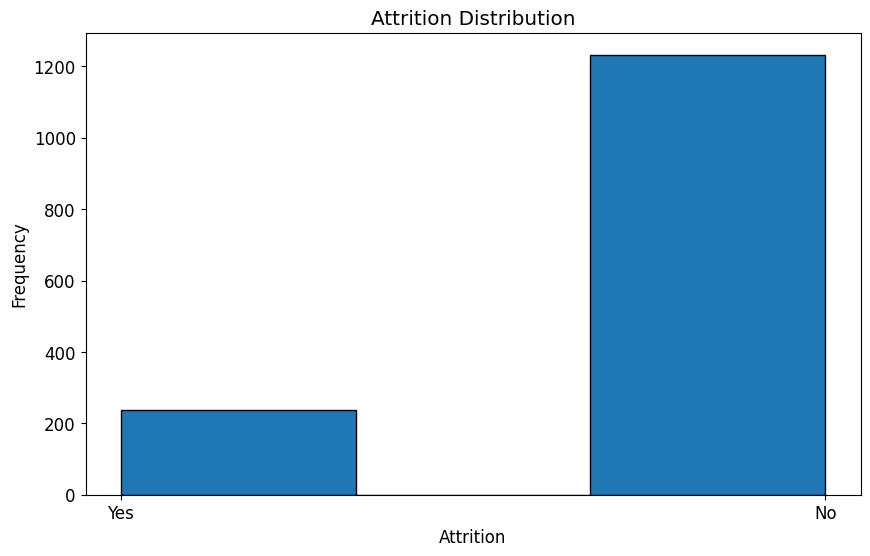

In [65]:
#convert categorical "Attrition" variable into a numerical one
label_encoder = LabelEncoder()
df['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])

#Attrition YES = 237 employees ---> TOTAL WORKERS(1470) - ATTRITION WORKS "NO"(1233) = 237 ATTRITION WORKERS "YES"
plt.figure(figsize=(10, 6))
plt.hist(df['Attrition'], bins=3, edgecolor='black')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.title('Attrition Distribution')
plt.savefig('../Plots/Attrition Distribution 1.png', format='png', dpi=300)
plt.show()

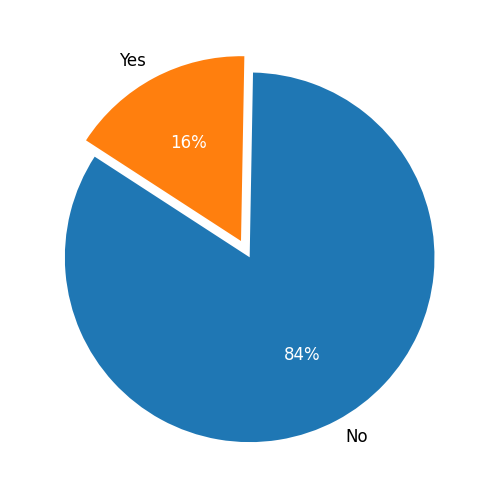

In [27]:
attrition_counts = df['Attrition'].value_counts()

explode = (0.1, 0)  # Explode label "Yes"

plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(attrition_counts, labels=attrition_counts.index, startangle=147,
                                    autopct='%1.0f%%', explode=explode)

# Change the color of the percentages to white
for autotext in autotexts:
    autotext.set_color('white')

# Change the color of the labels to black
for text in texts:
    text.set_color('black')
plt.savefig('../Plots/Attrition Distribution - Powerpoint.png', format='png', dpi=300)
plt.show()

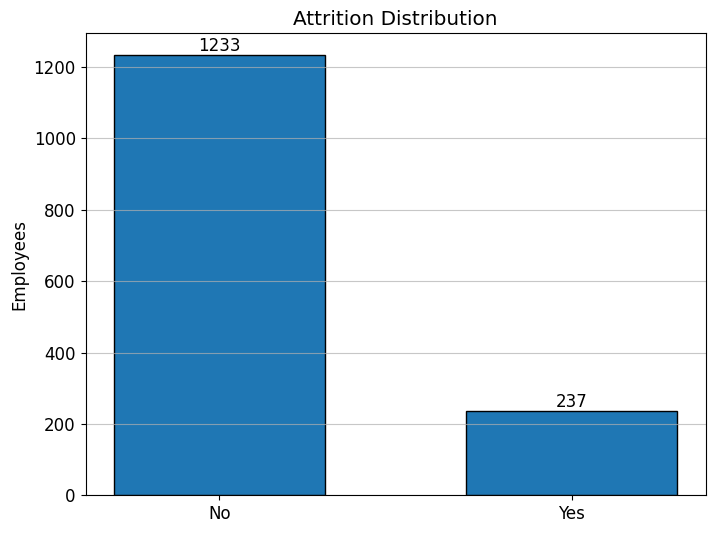

In [29]:
# Convert categorical "Attrition" variable into a numerical one
label_encoder = LabelEncoder()
df['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])


plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df['Attrition_encoded'], bins=2, edgecolor='black', align='left', rwidth=0.6)
plt.xticks([0, 0.5], ['No', 'Yes'])
plt.xlabel('')
plt.ylabel('Employees')
plt.title('Attrition Distribution')
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Annotate the bars with counts
for i in range(2):
    plt.annotate(int(n[i]), (bins[i], n[i]), ha='center', va='bottom')
plt.savefig('../Plots/Attrition Distribution 2.png', format='png', dpi=300)
plt.show()

## <a id='toc5_2_'></a>[5.2 Age](#toc0_)

In [30]:
# Calculate the average of the Age
average_age = df['Age'].mean()
print("Average Age:", average_age)


# Calculate the average age for employees with "Attrition" equal to "Yes"
average_age_yes = df[df['Attrition'] == 'Yes']['Age'].mean()

# Calculate the average age for employees with "Attrition" equal to "No"
average_age_no = df[df['Attrition'] == 'No']['Age'].mean()

print("Average Age for Attrition 'Yes':", average_age_yes)
print("Average Age for Attrition 'No':", average_age_no)

Average Age: 36.923809523809524
Average Age for Attrition 'Yes': 33.607594936708864
Average Age for Attrition 'No': 37.561232765612324


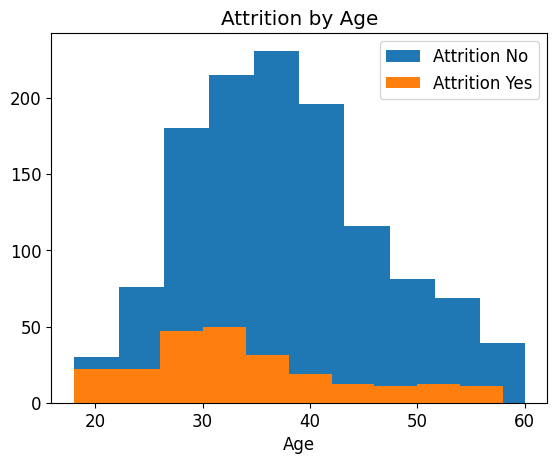

In [64]:
# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']
# Create histograms for both groups
plt.hist(attrition_no, bins=10, label='Attrition No')
plt.hist(attrition_yes, bins=10, label='Attrition Yes')

plt.xlabel('Age')
plt.ylabel('')
plt.title('Attrition by Age')
plt.legend()
plt.savefig('../Plots/Attrition by Age 1.png', format='png', dpi=300)
plt.show()

Younger people leave the company

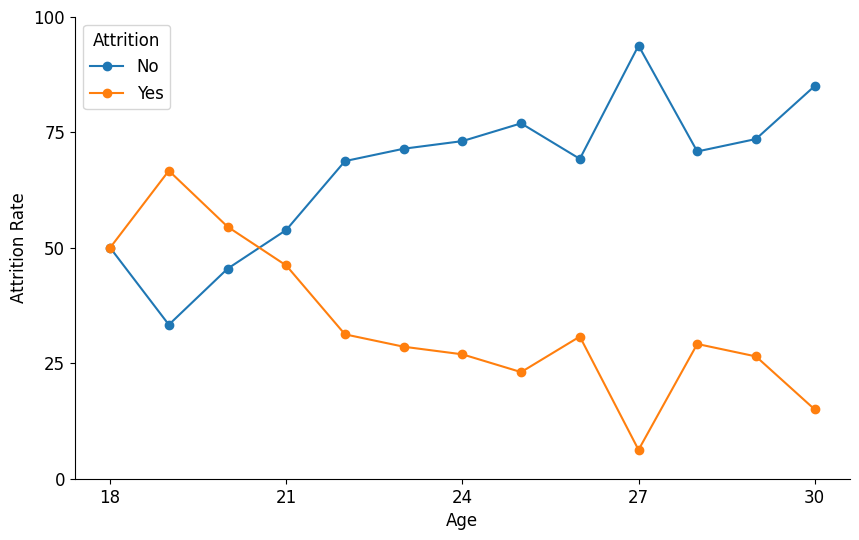

In [45]:
# Filtering the DataFrame to include only ages up to 30
df_filtered = df[df['Age'] <= 30]

# Grouping by Age and Attrition and counting the number of occurrences
attrition_counts_filtered = df_filtered.groupby(['Age', 'Attrition']).size().unstack(fill_value=0)

# Calculating attrition rates for the filtered data
attrition_rates_filtered = attrition_counts_filtered.div(attrition_counts_filtered.sum(axis=1), axis=0)*100

# Plotting with age up to 30
plt.figure(figsize=(10, 6))
attrition_rates_filtered.plot(kind='line', marker='o', ax=plt.gca())

# Setting x-axis labels to appear every 3 years within the new range
plt.xticks(range(min(df_filtered['Age']), max(df_filtered['Age']) + 1, 3))

# Setting y-axis labels from 0 to 100
plt.yticks(range(0, 101, 25))

plt.xlabel('Age')
plt.ylabel('Attrition Rate')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.grid(False)
# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../Plots/Attrition by Age 2.png', format='png', dpi=300)
plt.show()

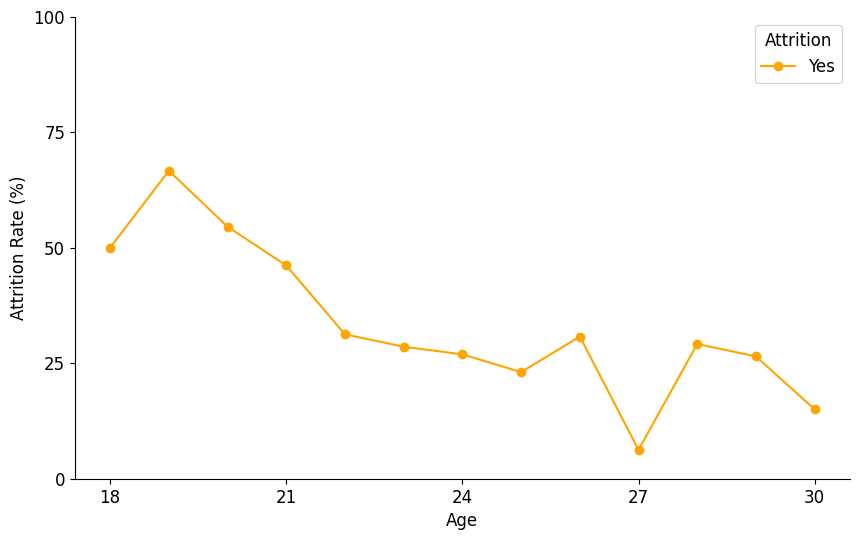

In [51]:
# Filtering the DataFrame to include only ages up to 30
df_filtered = df[df['Age'] <= 30]

# Grouping by Age and Attrition and counting the number of occurrences
attrition_counts_filtered = df_filtered.groupby(['Age', 'Attrition']).size().unstack(fill_value=0)

# If the 'Yes' column doesn't exist because there are no 'Yes' entries for some ages, add it with 0s
if 'Yes' not in attrition_counts_filtered:
    attrition_counts_filtered['Yes'] = 0

# Calculating attrition rates for 'Yes' only
attrition_rates_yes = attrition_counts_filtered['Yes'] / attrition_counts_filtered.sum(axis=1) * 100

# Plotting with age up to 30, only the 'Yes' attrition rates
plt.figure(figsize=(10, 6))
attrition_rates_yes.plot(kind='line', marker='o', color='orange')

# Setting x-axis labels to appear every 3 years within the new range
plt.xticks(range(min(df_filtered['Age']), max(df_filtered['Age']) + 1, 3))

# Setting y-axis labels from 0 to 100
plt.yticks(range(0, 101, 25))

plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.grid(False)
plt.legend(title='Attrition', labels=['Yes'])

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Plots/Attrition by Age - PowerPoint.png', format='png', dpi=300)

plt.show()

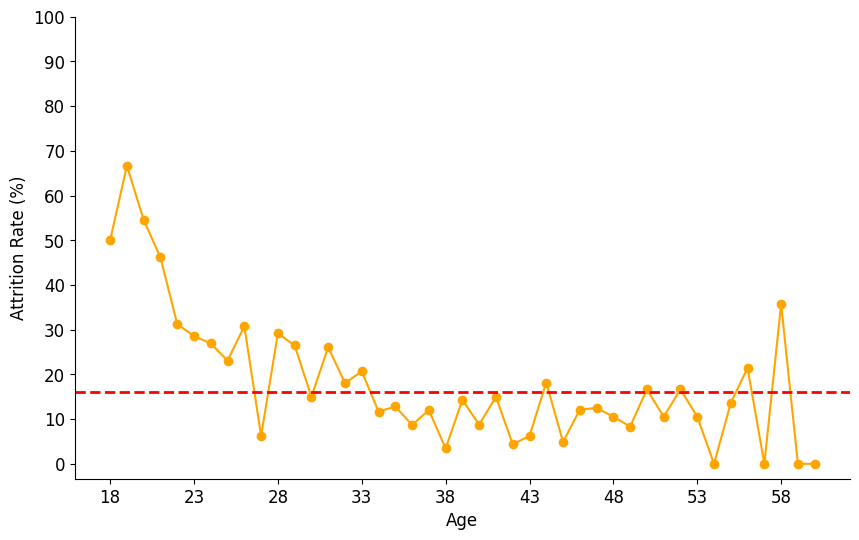

In [59]:
# Grouping by Age and Attrition and counting the number of occurrences
attrition_counts = df.groupby(['Age', 'Attrition']).size().unstack(fill_value=0)

# If the 'Yes' column doesn't exist because there are no 'Yes' entries for some ages, add it with 0s
if 'Yes' not in attrition_counts:
    attrition_counts['Yes'] = 0

# Calculating attrition rates for 'Yes' only
attrition_rates_yes = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100

# Plotting for all ages
plt.figure(figsize=(10, 6))
attrition_rates_yes.plot(kind='line', marker='o', color='orange')

# Drawing a horizontal line at the 16% mark
plt.axhline(y=16, color='r', linestyle='--', linewidth=2)

# Setting x-axis labels to show every unique age
plt.xticks(attrition_counts.index.unique())

# Setting y-axis labels from 0 to 100
plt.yticks(range(0, 101, 10))
plt.xticks(range(min(df['Age']), max(df['Age']) + 1, 5))

plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.grid(False)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Plots/Attrition by Age 3.png', format='png', dpi=300)

plt.show()

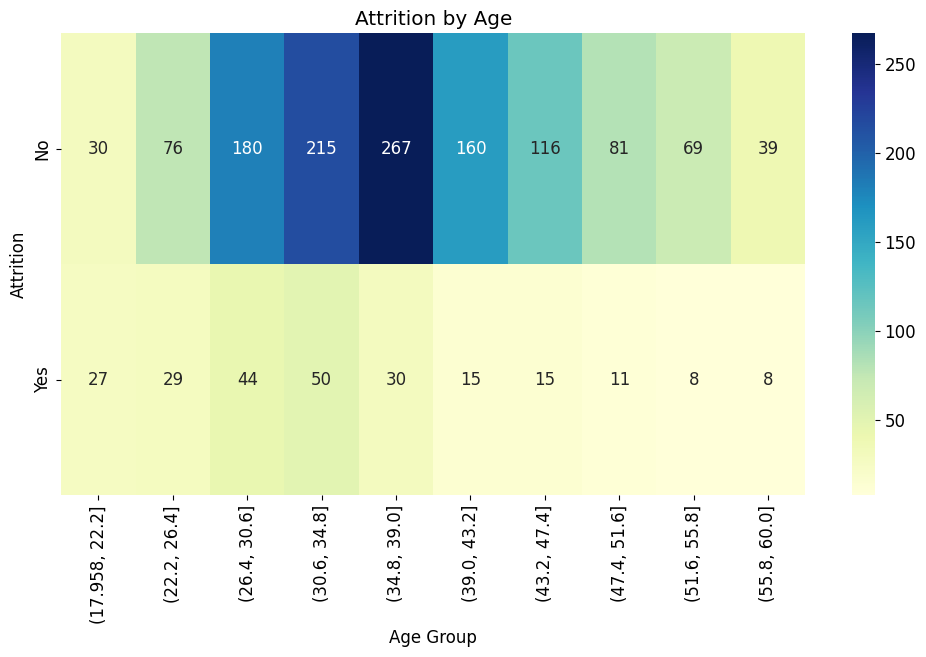

In [60]:
# Create a binned age column
df['Age_bin'] = pd.cut(df['Age'], bins=10)

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='Attrition', columns='Age_bin', values='Age', aggfunc='count', fill_value=0)

# Plot heatmap using seaborn
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Attrition by Age')
plt.ylabel('Attrition')
plt.xlabel('Age Group')
plt.savefig('../Plots/Attrition by Age 4.png', format='png', dpi=300)
plt.show()

## <a id='toc5_3_'></a>[5.3 Gender](#toc0_)

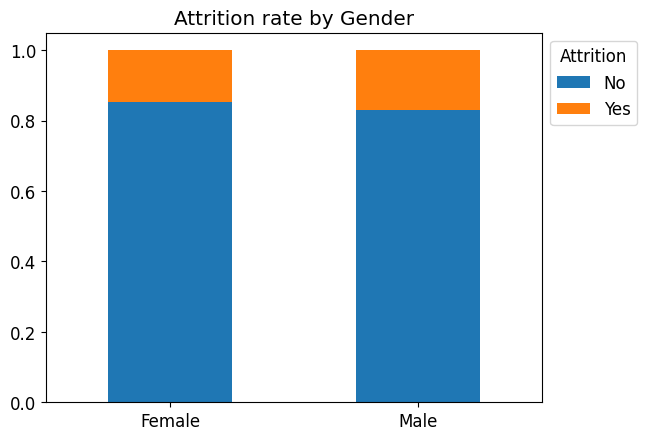

In [63]:
# Group the data by Gender and calculate attrition rates
attrition_rates = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()

attrition_rates.plot(kind='bar', stacked=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Attrition rate by Gender')
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=0)
plt.savefig('../Plots/Attrition by Gender 1.png', format='png', dpi=300)
plt.show()

Proportion of Female and Male that leave the company is similar

In [62]:
# Count the number of employees by gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Count the number of male and female employees with "Attrition" equal to "Yes"
attrition_yes_counts = df[df['Attrition'] == 'Yes']['Gender'].value_counts()

# Count the number of male and female employees with "Attrition" equal to "No"
attrition_no_counts = df[df['Attrition'] == 'No']['Gender'].value_counts()

# Display the counts for both groups
print("Counts for Attrition 'Yes':")
print(attrition_yes_counts)
print("\nCounts for Attrition 'No':")
print(attrition_no_counts)

Gender
Male      882
Female    588
Name: count, dtype: int64
Counts for Attrition 'Yes':
Gender
Male      150
Female     87
Name: count, dtype: int64

Counts for Attrition 'No':
Gender
Male      732
Female    501
Name: count, dtype: int64


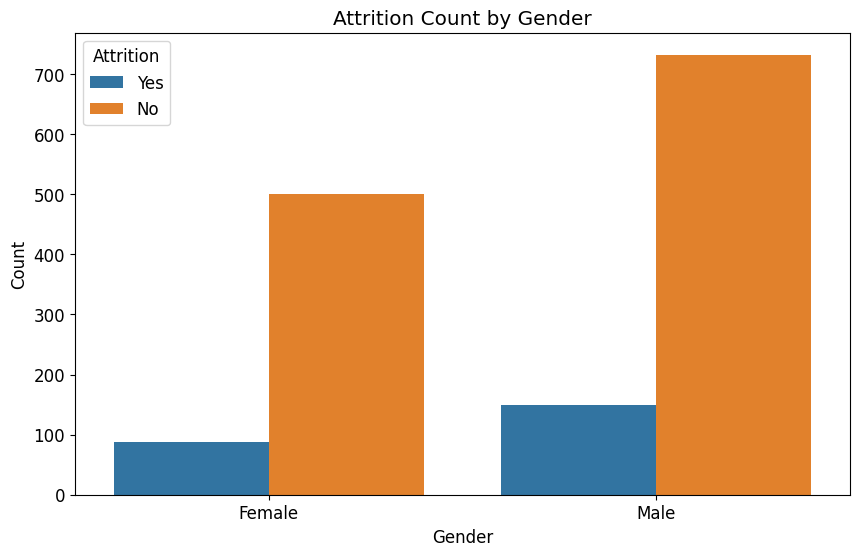

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition Count by Gender')
plt.savefig('../Plots/Attrition by Gender 2.png', format='png', dpi=300)
plt.show()

## <a id='toc5_4_'></a>[5.4 Marital Status](#toc0_)

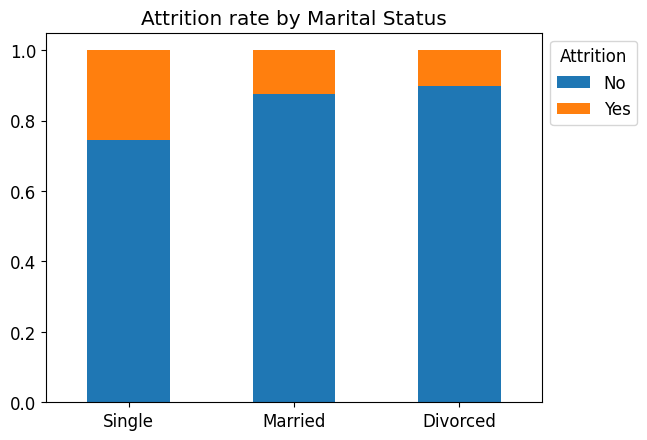

In [67]:
# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending= False)

# Create a bar chart to visualize marital status by attrition, sorted by the "Attrition Yes" rate
attrition_rates.plot(kind='bar', stacked=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Attrition rate by Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('../Plots/Attrition by Marital Status 1.png', format='png', dpi=300)
plt.show()

In [68]:
# Count the number of employees in each marital status category
marital_status_counts = df['MaritalStatus'].value_counts()
print(marital_status_counts)

# Count the number of employees who said "Yes" or "No" for attrition in each marital status category
marital_status_counts = df.groupby(['MaritalStatus', 'Attrition']).size().unstack(fill_value=0)
print(marital_status_counts)

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


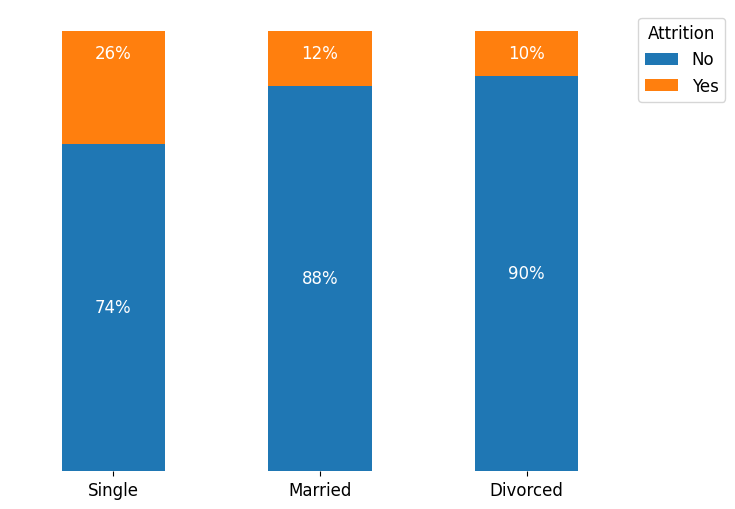

In [91]:
# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=False)

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(8, 6))
attrition_rates.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Hide y-axis ticks
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')


# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='white')
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height() - 0.05, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='white')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('../Plots/Attrition by Marital Status - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_5_'></a>[5.5 Department](#toc0_)

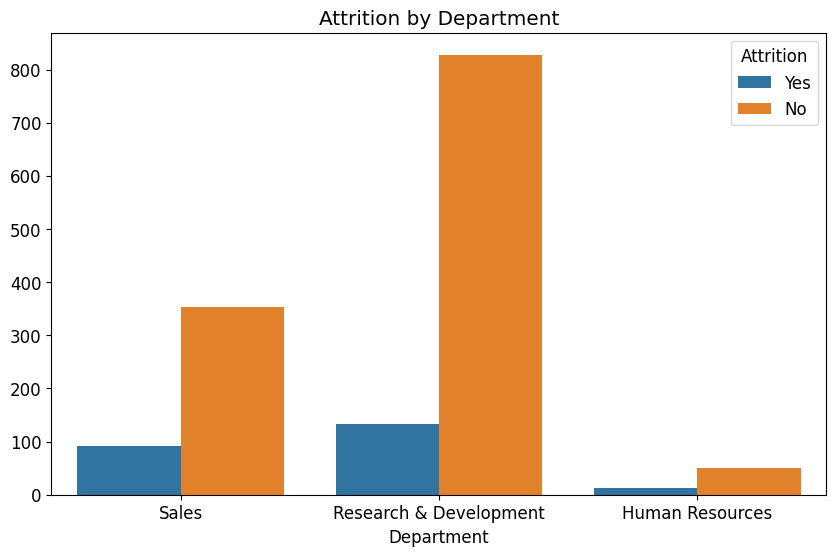

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)

plt.xlabel('Department')
plt.ylabel('')
plt.title('Attrition by Department')
plt.savefig('../Plots/Attrition by Department 1.png', format='png', dpi=300)
plt.show()

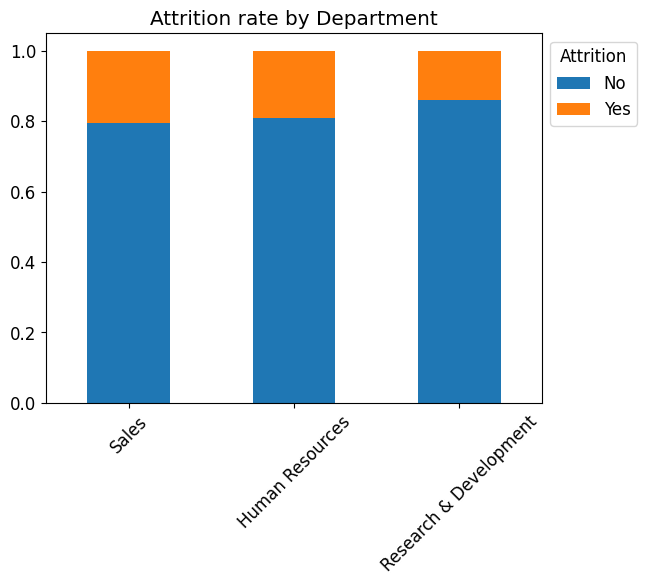

In [79]:
# Group the data by Department and calculate attrition rates
attrition_rates = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending= False)

# Create a bar chart
attrition_rates.plot(kind='bar', stacked=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Attrition rate by Department')
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45) 
plt.savefig('../Plots/Attrition by Department 2.png', format='png', dpi=300)
plt.show()

In [80]:
# Count the number of employees who said "Yes" or "No" for attrition in each Department category
department_counts = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
print(department_counts)

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


## <a id='toc5_6_'></a>[5.6 Job Role](#toc0_)

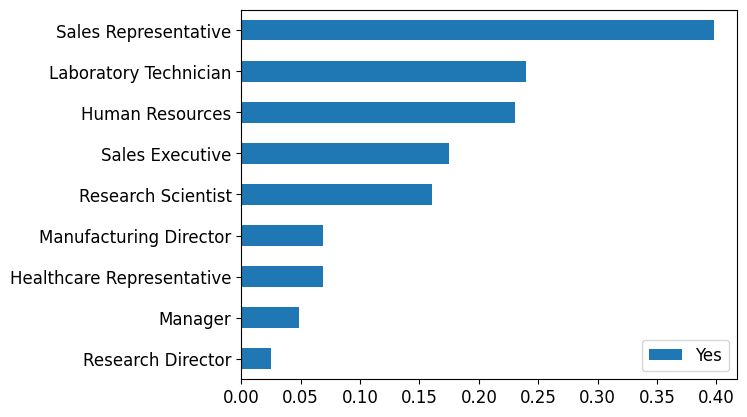

In [82]:
# Group the data by JobRole and calculate attrition rates
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending= True)

# Create a bar chart with sorted 'Yes' attrition rates, "Job Role" on the y-axis
attrition_rates.plot(kind='barh', y='Yes')
plt.ylabel('')
plt.xlabel('')
plt.savefig('../Plots/Attrition by Job Role 1.png', format='png', dpi=300)
plt.show()

In [83]:
# Count the number of employees who said "Yes" or "No" for attrition in each Job role category
jobrole_counts = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
print(jobrole_counts)

# Calculate the percentage of "Yes" attrition for each job role
jobrole_counts['Percentage_Yes'] = (jobrole_counts['Yes'] / (jobrole_counts['Yes'] + jobrole_counts['No'])) * 100

# Display the counts and percentages
print(jobrole_counts)

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
Attrition                   No  Yes  Percentage_Yes
JobRole                                            
Healthcare Representative  122    9        6.870229
Human Resources             40   12       23.076923
Laboratory Technician      197   62       23.938224
Manager                     97    5        4.901961
Manufacturing Director     135   10        6.896552
Research Director           78    2        2.500000
Research Scientist         245   47       16.095890
Sales Executive            269   57       17.484663
Sales Representative        50   33       39.759036


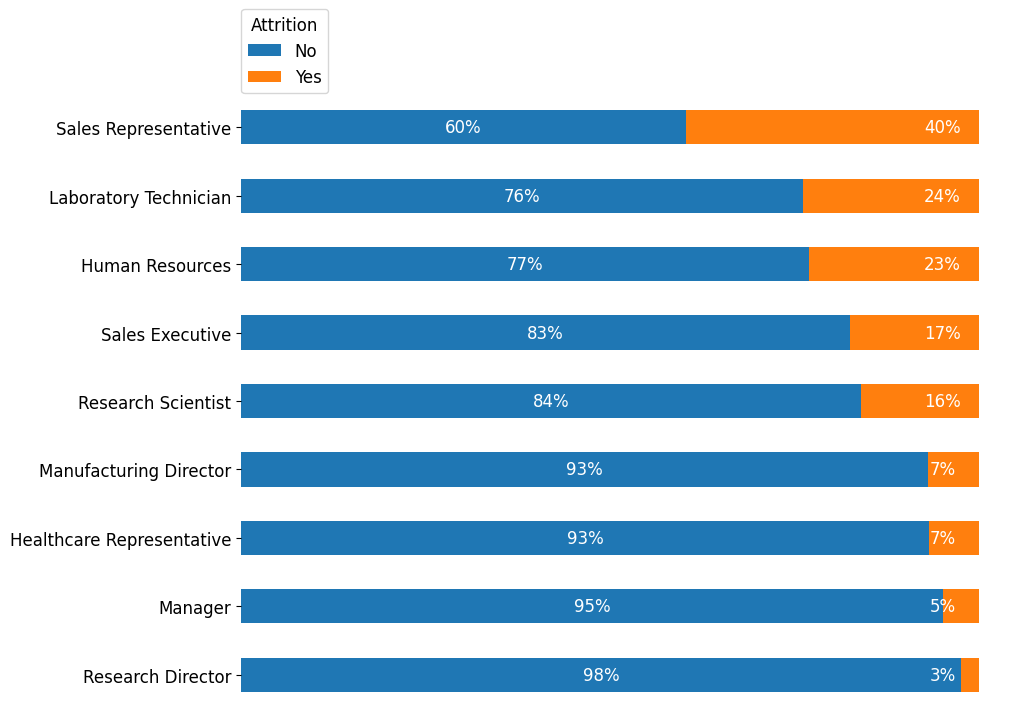

In [3]:
# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=True)  # Reverse the order

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 8))
attrition_rates.plot(kind='barh', stacked=True, ax=plt.gca())
plt.ylabel('')
plt.xlabel('')
plt.yticks(rotation=0)
plt.xticks([])  # Hide x-axis ticks
plt.legend(title='Attrition', bbox_to_anchor=(0, 1, 1, 0), loc='lower left', borderaxespad=0)

# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='white')
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width() - 0.05, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='white')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('../Plots/Attrition by Job Role - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_7_'></a>[5.7 OverTime](#toc0_)

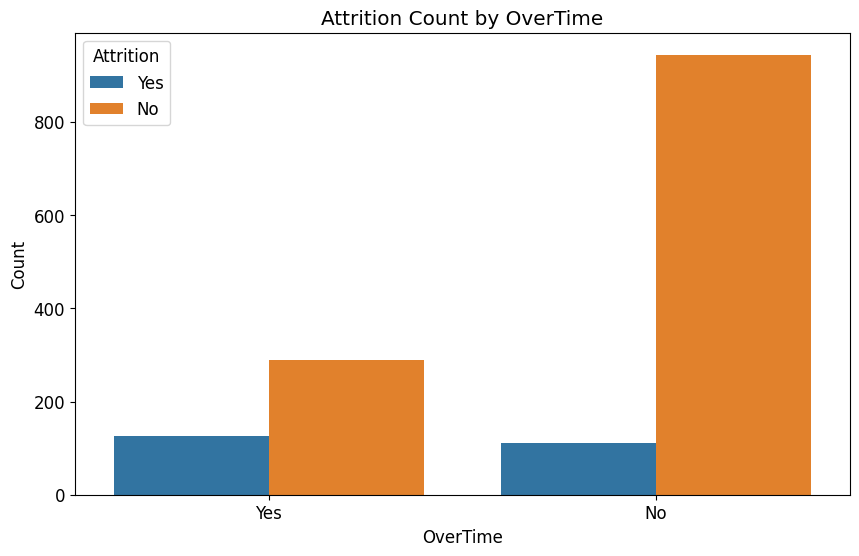

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Count by OverTime')
plt.savefig('../Plots/Attrition by OverTime 1.png', format='png', dpi=300)
plt.show()

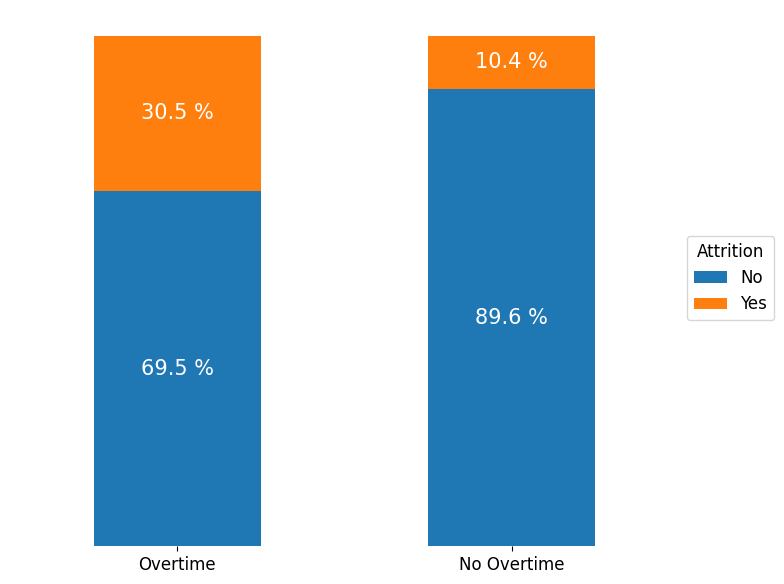

In [113]:
# Create a pivot table of counts
pivot_counts = df.pivot_table(index='OverTime', columns='Attrition', values='Age', aggfunc='count').fillna(0)

# Convert counts to percentages
pivot_percentages = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Reverse the order of the rows for plotting
pivot_percentages = pivot_percentages.iloc[::-1]

# Plot 100% stacked bar chart in vertical orientation
ax = pivot_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors, )

# Remove border lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add percentage annotations inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2,  # Centering vertically
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', size=15)

plt.legend(title='Attrition', loc='center left', bbox_to_anchor=(1, 0.5))

# Change the x labels and adjust them to be horizontal
ax.set_xticklabels(['Overtime', 'No Overtime'], rotation=0) 
ax.set_xlabel('')

# Remove y-ticks
ax.set_yticks([])
plt.tight_layout()
plt.savefig('../Plots/Attrition by OverTime - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_8_'></a>[5.8 Distance From Home](#toc0_)

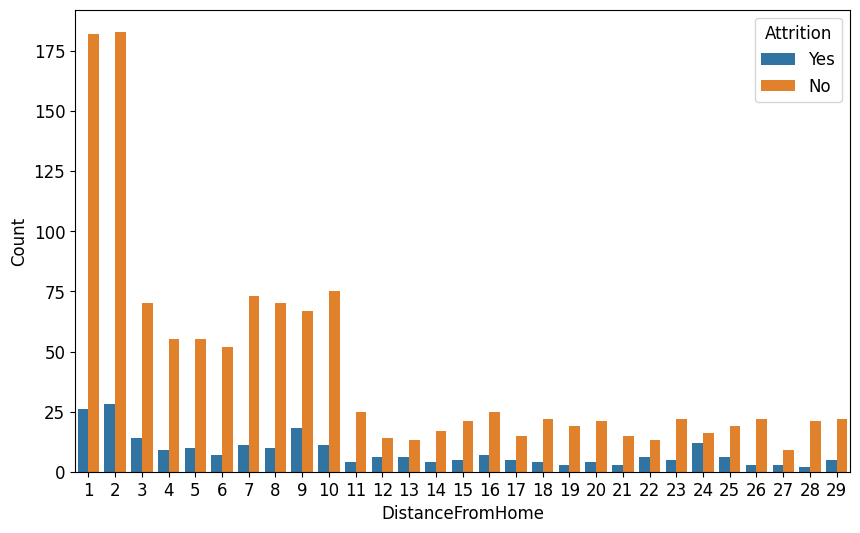

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df)
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.savefig('../Plots/Attrition by DistanceFromHome 1.png', format='png', dpi=300)
plt.show()

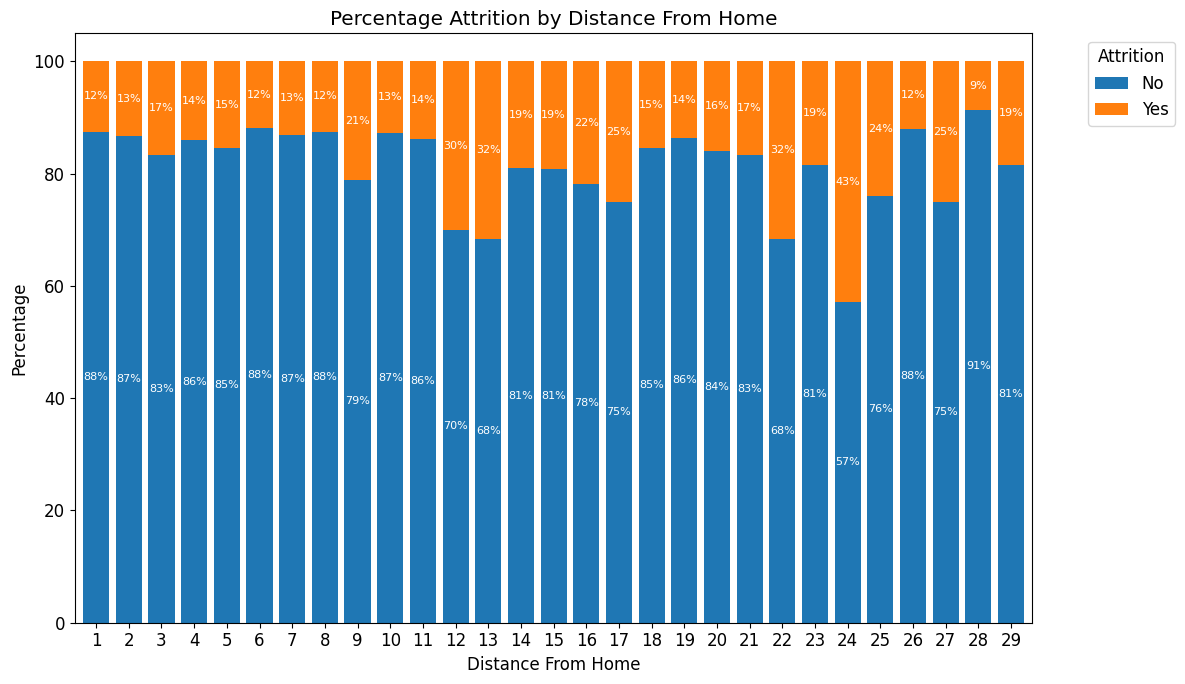

In [131]:
# Create a pivot table without distance categorization
pivot_df = df.groupby(['DistanceFromHome', 'Attrition']).size().unstack()

# Calculate the percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Plot the data
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.8)
plt.title('Percentage Attrition by Distance From Home')
plt.ylabel('Percentage')
plt.xlabel('Distance From Home')
plt.xticks(rotation=0)
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations for clarity
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()
plt.savefig('../Plots/Attrition by DistanceFromHome 2.png', format='png', dpi=300)
plt.show()

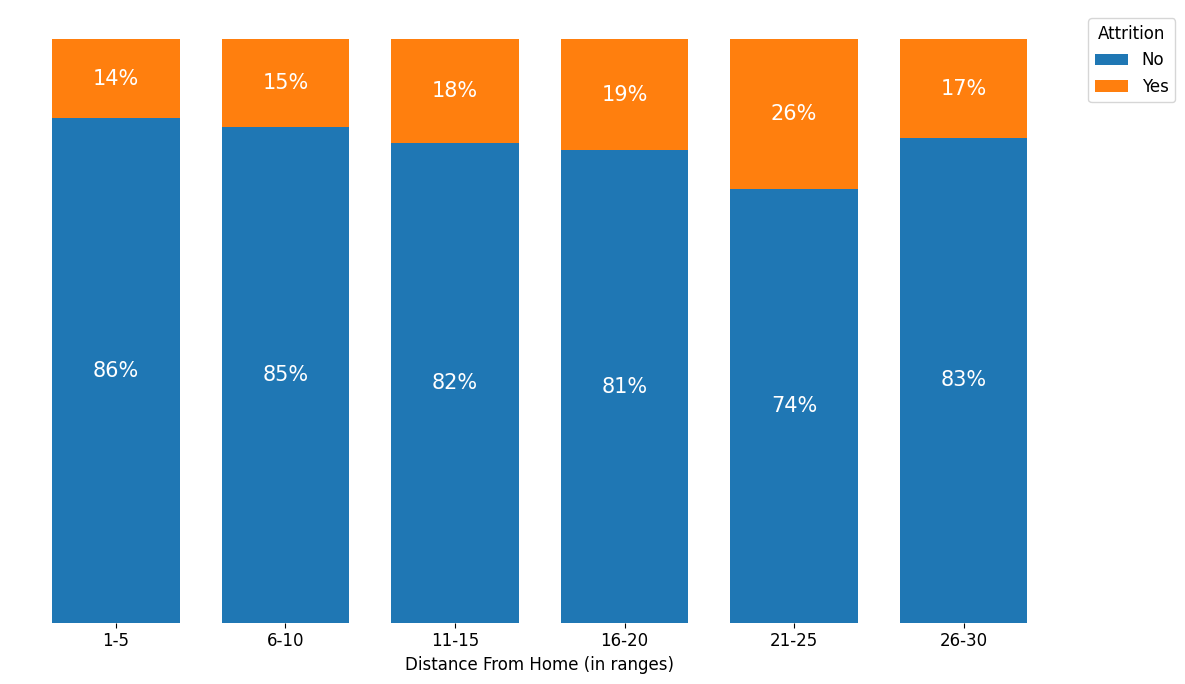

In [128]:
# Define distance bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
df['DistanceBin'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)

# Create a pivot table with the distance bins
pivot_df = df.groupby(['DistanceBin', 'Attrition']).size().unstack()

# Calculate the percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100


# Plot the data
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.75)
plt.xlabel('Distance From Home (in ranges)')
plt.xticks(rotation=0)

# Adjust the position of the legend to bring it closer to the plot
plt.legend(title='Attrition', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove the borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove the Y-axis labels and ticks
ax.set_ylabel('')
ax.set_yticks([])

# Add annotations for clarity
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', color='white', size=15)

plt.tight_layout()
plt.savefig('../Plots/Attrition by DistanceFromHome - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_9_'></a>[5.9 Business Travel](#toc0_)

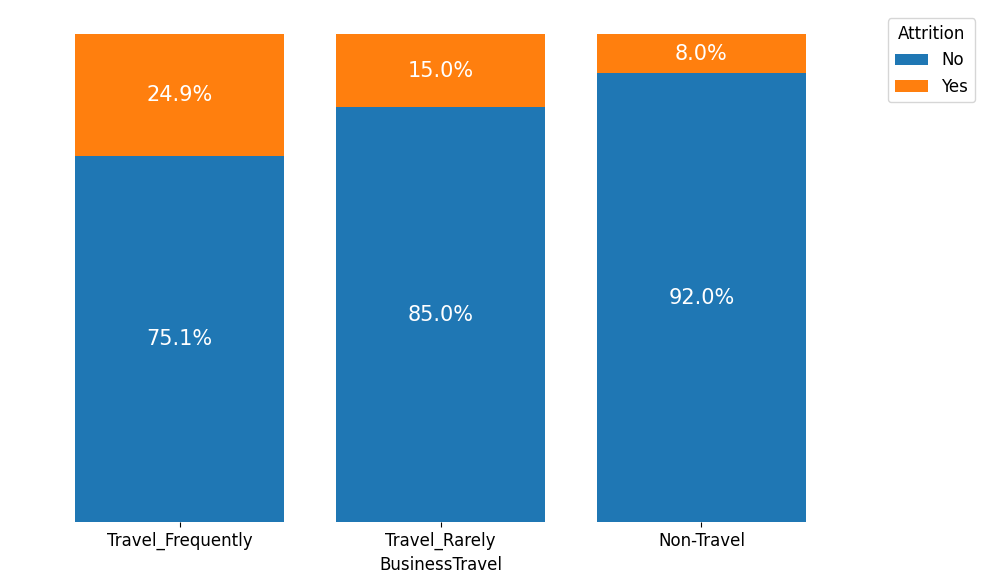

In [136]:
# First, we'll pivot the data to get the counts for each BusinessTravel category and Attrition status
pivot_df = df.groupby(['BusinessTravel', 'Attrition']).size().unstack().fillna(0)

# Convert these counts into percentages
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Reorder the DataFrame rows to match the desired order
pivot_df_percentage = pivot_df_percentage.reindex(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'])

# Plot the stacked bar chart
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Set title and labels
plt.xlabel('BusinessTravel')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust the position of the legend to bring it closer to the plot
plt.legend(title='Attrition', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove the Y-axis labels and ticks
ax.set_ylabel('')
ax.set_yticks([])

# Display the percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", ha='center', va='center', fontsize=15, color='white')

plt.tight_layout()
plt.savefig('../Plots/Attrition by BusinessTravel - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_10_'></a>[5.10 Years at the Company](#toc0_)

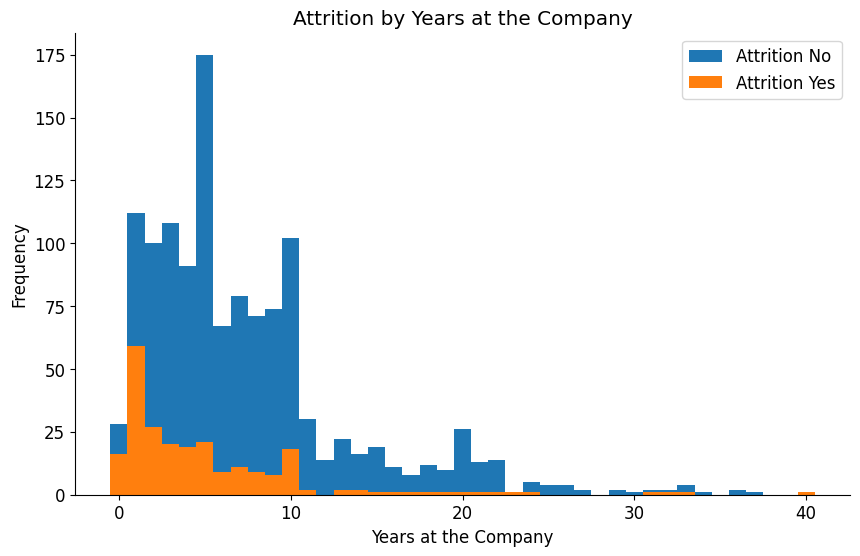

In [139]:
# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['YearsAtCompany']
attrition_no = df[df['Attrition'] == 'No']['YearsAtCompany']


# Set figure size
plt.figure(figsize=(10, 6))

# Define the bins to be by year based on the maximum years in the dataset
bins = range(0, int(df['YearsAtCompany'].max()) + 2)  # Add 2 to ensure the last year is included

# Create histograms for both groups using the specified colors and bins
plt.hist(attrition_no, bins=bins, label='Attrition No', align='left')
plt.hist(attrition_yes, bins=bins, label='Attrition Yes', align='left')

plt.xlabel('Years at the Company')
plt.ylabel('Frequency')
plt.title('Attrition by Years at the Company')
plt.legend(loc='upper right')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Plots/Attrition by Years at the Company 1.png', format='png', dpi=300)
plt.show()

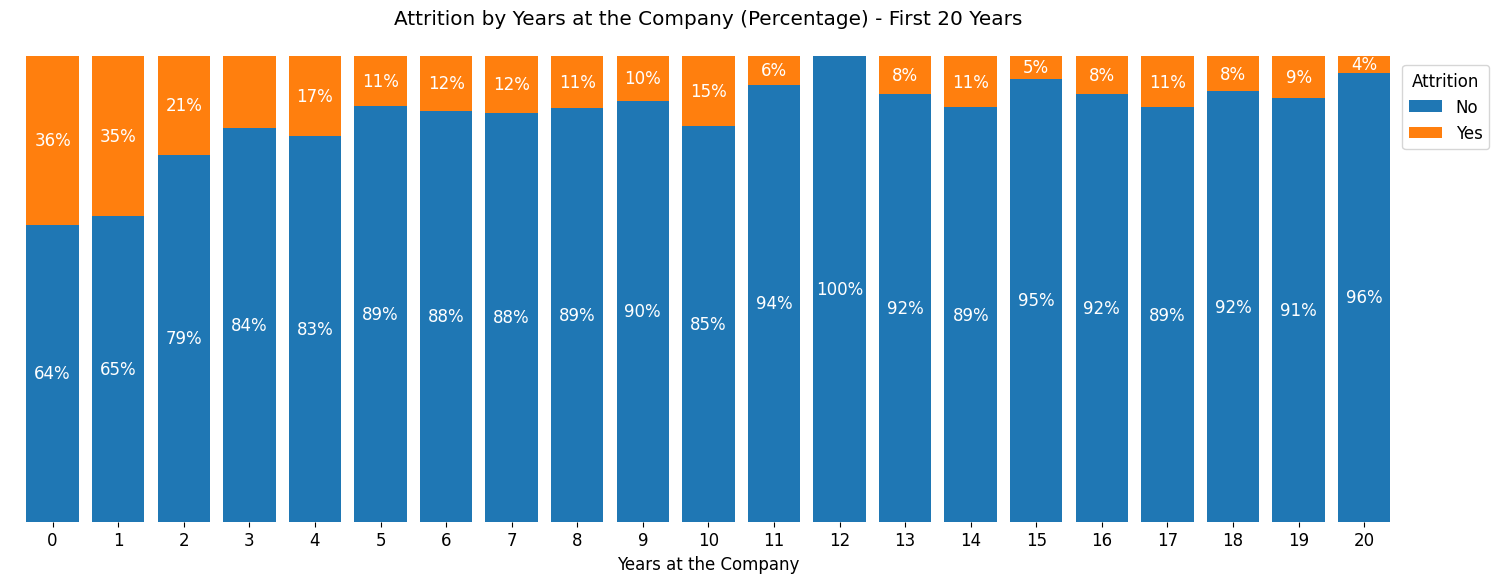

In [142]:
# Filter data for only the first 20 years
df_filtered = df[df['YearsAtCompany'] <= 20]

# Group by YearsAtCompany and Attrition, then unstack to get count of Yes and No attrition for each year
grouped = df_filtered.groupby(['YearsAtCompany', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for each attrition category (Yes and No)
grouped['Total'] = grouped['Yes'] + grouped['No']
grouped['Yes (%)'] = grouped['Yes'] / grouped['Total'] * 100
grouped['No (%)'] = grouped['No'] / grouped['Total'] * 100


# Plot 100% stacked bar chart
ax = grouped[['No (%)', 'Yes (%)']].plot(kind='bar', stacked=True, figsize=(15, 6), width=0.8)

# Place the legend further outside the plot on the right side
ax.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1.065, 0.95), loc='upper right')


# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Check if height is not zero and if it's not the 'Yes' bar for year 12
    if height > 0 and not (i == 24):  # 24 is the index for 'Yes' bar at year 12
        ax.text(x + width / 2, y + height / 2, f'{int(round(height))}%', horizontalalignment='center', verticalalignment='center', color='white')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove Y-label and Y-ticks
ax.set_ylabel('')
ax.set_yticks([])

# Horizontal x-ticks
ax.tick_params(axis='x', rotation=0)

plt.title('Attrition by Years at the Company (Percentage) - First 20 Years')
plt.xlabel('Years at the Company')
plt.tight_layout()

plt.savefig('../Plots/Attrition by Years at the Company 2.png', format='png', dpi=300)
plt.show()

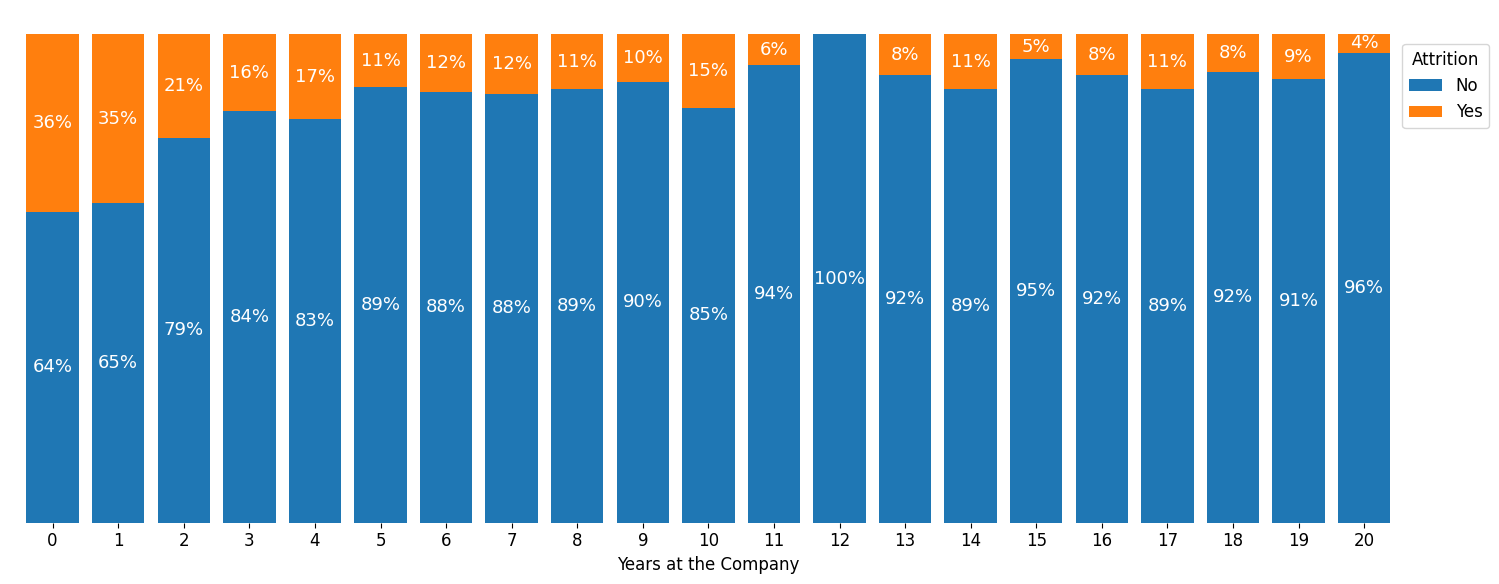

In [152]:
# Filter data for only the first 20 years
df_filtered = df[df['YearsAtCompany'] <= 20]

# Group by YearsAtCompany and Attrition, then unstack to get count of Yes and No attrition for each year
grouped = df_filtered.groupby(['YearsAtCompany', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for each attrition category (Yes and No)
grouped['Total'] = grouped['Yes'] + grouped['No']
grouped['Yes (%)'] = grouped['Yes'] / grouped['Total'] * 100
grouped['No (%)'] = grouped['No'] / grouped['Total'] * 100


# Plot 100% stacked bar chart
ax = grouped[['No (%)', 'Yes (%)']].plot(kind='bar', stacked=True, figsize=(15, 6), width=0.8)

# Place the legend further outside the plot on the right side
ax.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1.065, 0.95), loc='upper right')


# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Adjust vertical alignment for better visibility
    vertical_alignment = 'center' if height > 3 else 'bottom'
    offset = 0 if height > 3 else height
    
    if height > 0:  # Only annotate bars with height greater than 0
        label = f'{int(round(height))}%'
        ax.text(x + width / 2, y + offset + height / 2, label, 
                ha='center', va=vertical_alignment, color='black' if height < 3 else 'white', size=13)


# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove Y-label and Y-ticks
ax.set_ylabel('')
ax.set_yticks([])

# Horizontal x-ticks
ax.tick_params(axis='x', rotation=0)

plt.xlabel('Years at the Company')
plt.tight_layout()

plt.savefig('../Plots/Attrition by Years at the Company - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_11_'></a>[5.11 Monthly Income](#toc0_)

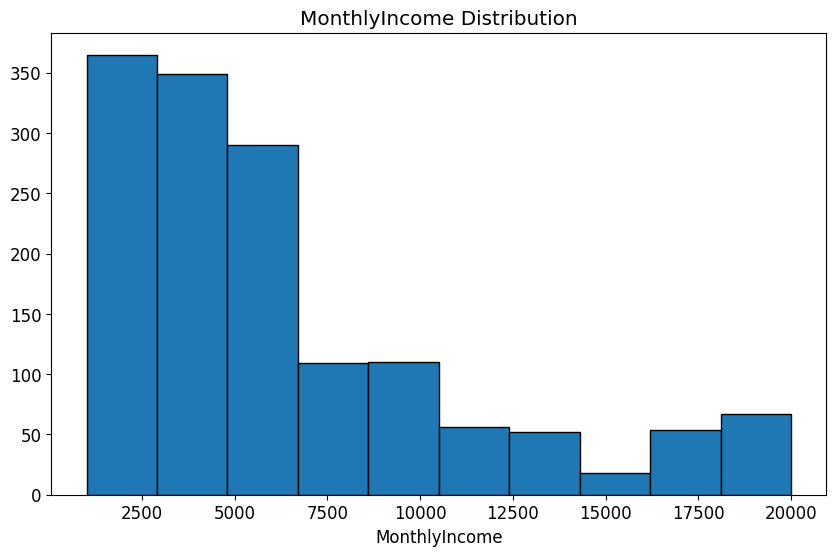

In [153]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=10, edgecolor='black')
plt.xlabel('MonthlyIncome')
plt.ylabel('')
plt.title('MonthlyIncome Distribution')
plt.savefig('../Plots/Attrition by Monthly Income 1.png', format='png', dpi=300)
plt.show()

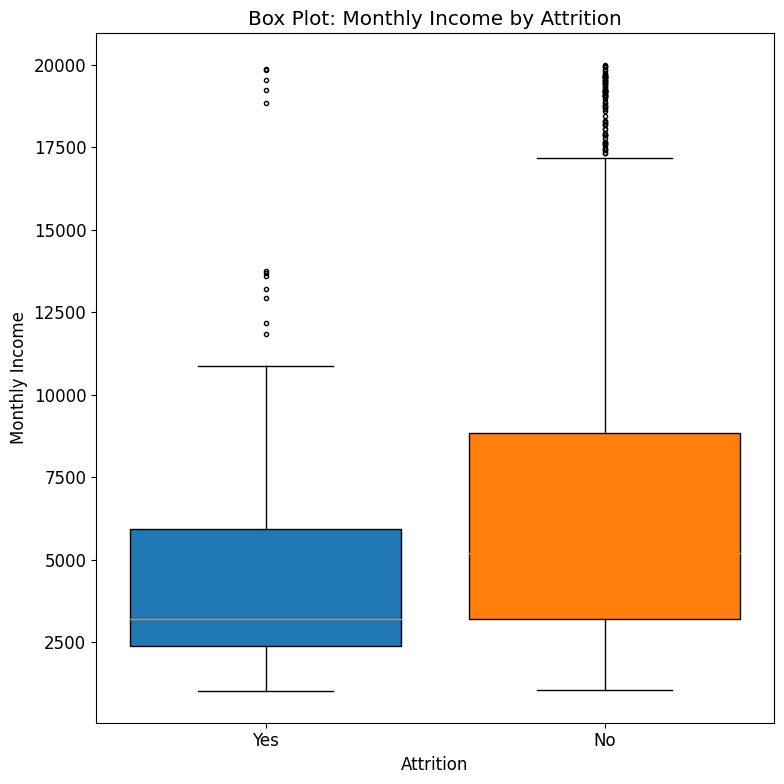

In [157]:
# Set the plot size
plt.figure(figsize=(8, 8))

# Create a box plot to visualize MonthlyIncome by attrition
# Adjusting the widths parameter to make boxes wider
bp = plt.boxplot([df[df['Attrition'] == 'Yes']['MonthlyIncome'], df[df['Attrition'] == 'No']['MonthlyIncome']],
                 labels=['Yes', 'No'], patch_artist=True, sym='.', widths=0.8)

# Applying the colors to the boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.title('Box Plot: Monthly Income by Attrition')
plt.tight_layout()
plt.savefig('../Plots/Attrition by Monthly Income 2.png', format='png', dpi=300)
plt.show()

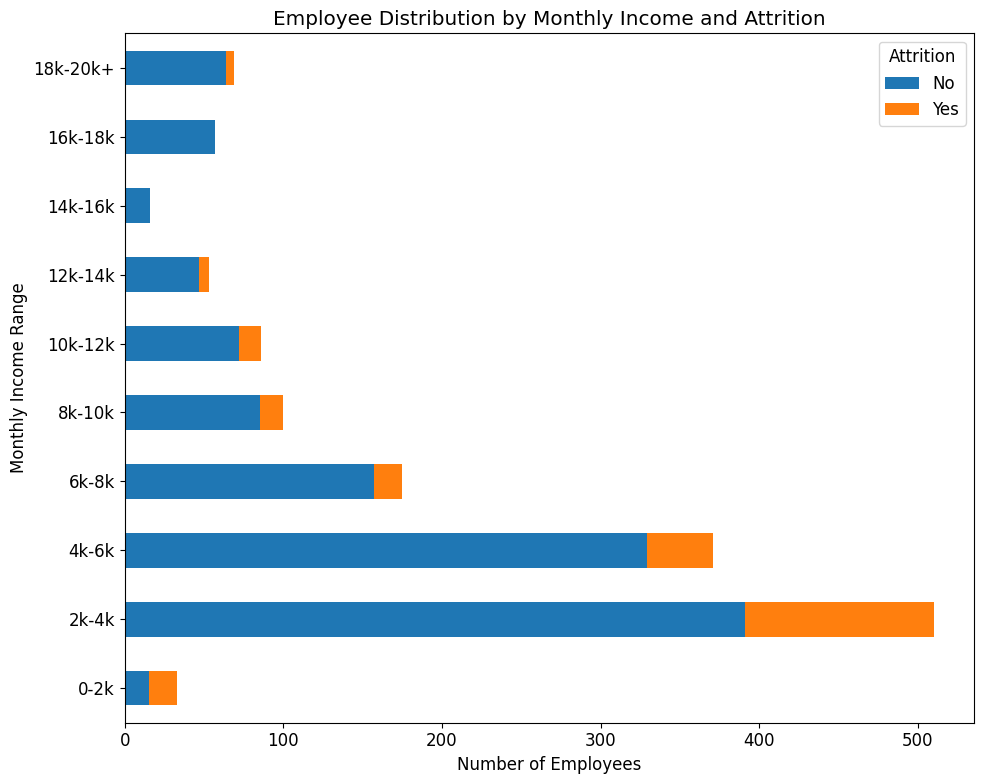

In [163]:
income_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]
income_labels = ['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k-12k', '12k-14k', '14k-16k', '16k-18k', '18k-20k+']

# Bin the data
df['IncomeRange'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels)

# Calculate counts for each combination of income range and attrition
income_attrition_counts = df.groupby(['IncomeRange', 'Attrition']).size().reset_index(name='Count')

# Pivot the data for plotting
income_attrition_pivot = income_attrition_counts.pivot(index='IncomeRange', columns='Attrition', values='Count')

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
income_attrition_pivot.plot(kind='barh', stacked=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Number of Employees')
plt.ylabel('Monthly Income Range')
plt.title('Employee Distribution by Monthly Income and Attrition')
plt.legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.savefig('../Plots/Attrition by Monthly Income 3.png', format='png', dpi=300)
plt.show()

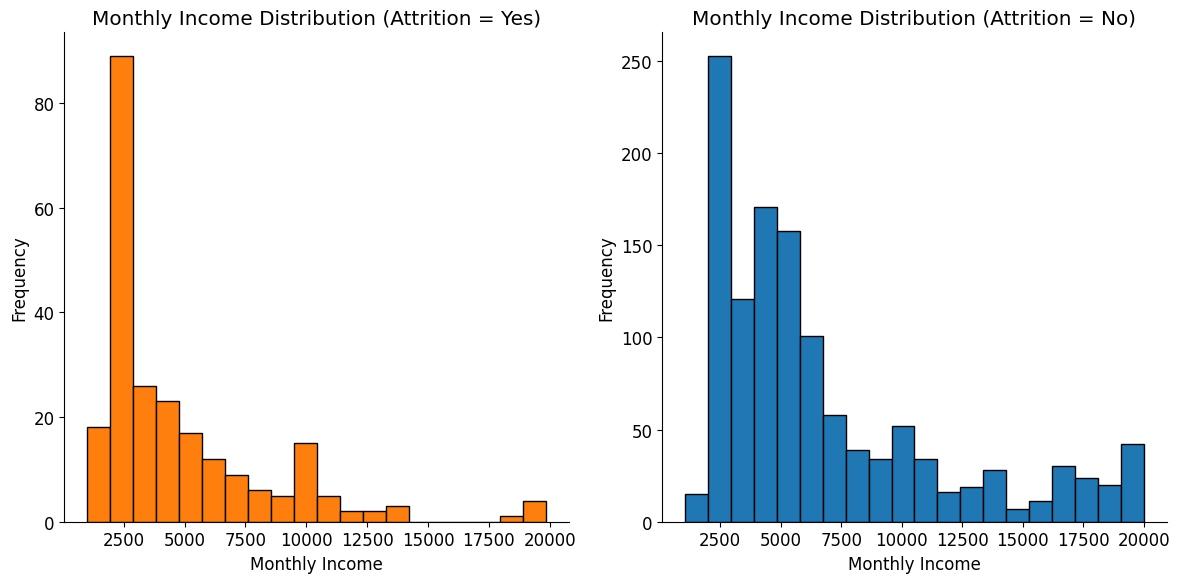

In [188]:
# Filter the DataFrame based on 'Attrition' value
attrition_yes = df[df['Attrition'] == 1]['MonthlyIncome']
attrition_no = df[df['Attrition'] == 0]['MonthlyIncome']

# Plotting
plt.figure(figsize=(12, 6))

# Histogram for Attrition = Yes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(attrition_yes, bins=20, color=color2, edgecolor='black')
plt.title('Monthly Income Distribution (Attrition = Yes)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Histogram for Attrition = No
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(attrition_no, bins=20, color=color1, edgecolor='black')
plt.title('Monthly Income Distribution (Attrition = No)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.savefig('../Plots/Attrition by Monthly Income 4.png', format='png', dpi=300)
plt.show()

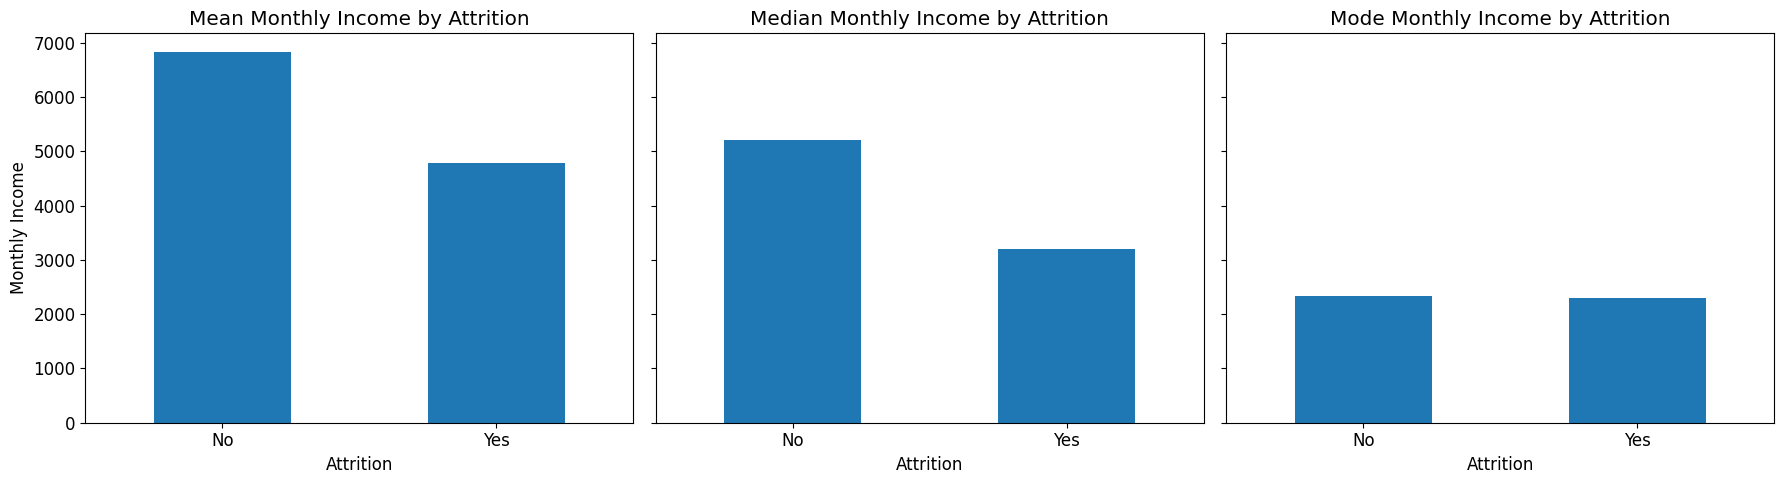

In [193]:
# Calculate mean, median, and mode of MonthlyIncome for both Attrition groups
mean_income = df.groupby('Attrition')['MonthlyIncome'].mean()
median_income = df.groupby('Attrition')['MonthlyIncome'].median()
mode_income = df.groupby('Attrition')['MonthlyIncome'].agg(lambda x: x.mode().iloc[0])

# Creating a function to plot the bar plots to reduce repetition
def plot_bar(data, title, ax):
    data.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Attrition')
    ax.set_ylabel('Monthly Income')
    ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Plotting the bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_bar(mean_income, 'Mean Monthly Income by Attrition', axes[0])
plot_bar(median_income, 'Median Monthly Income by Attrition', axes[1])
plot_bar(mode_income, 'Mode Monthly Income by Attrition', axes[2])

plt.tight_layout()
plt.savefig('../Plots/Attrition by Monthly Income 5.png', format='png', dpi=300)
plt.show()

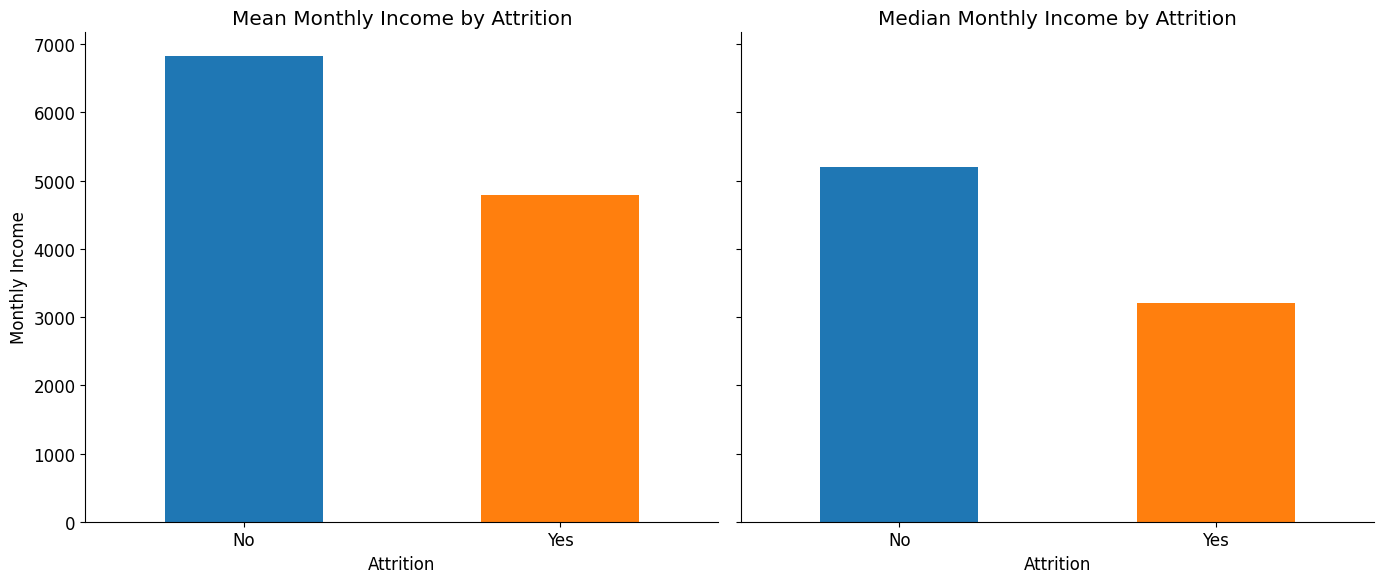

In [197]:
# Update the matplotlib settings for font size
plt.rcParams.update({'font.size': 12})

# Define the color palette
palette_colors = sns.color_palette("tab10")
color1 = palette_colors[0]  # Strong Blue
color2 = palette_colors[1]  # Strong Green
colors = [color1, color2]

# Plotting the bar plots for Mean and Median Monthly Income by Attrition with updated aesthetics
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Adjusted for 2 subplots

# Plot for Mean Monthly Income
mean_income.plot(kind='bar', ax=axes[0], color=[color1, color2])
axes[0].set_title('Mean Monthly Income by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Monthly Income')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Remove the top and right spines from the mean plot
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot for Median Monthly Income
median_income.plot(kind='bar', ax=axes[1], color=[color1, color2])
axes[1].set_title('Median Monthly Income by Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Monthly Income')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

# Remove the top and right spines from the median plot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('../Plots/Attrition by Monthly Income - PowerPoint.png', format='png', dpi=300)
plt.show()

## <a id='toc5_12_'></a>[5.12 Job Satisfaction](#toc0_)

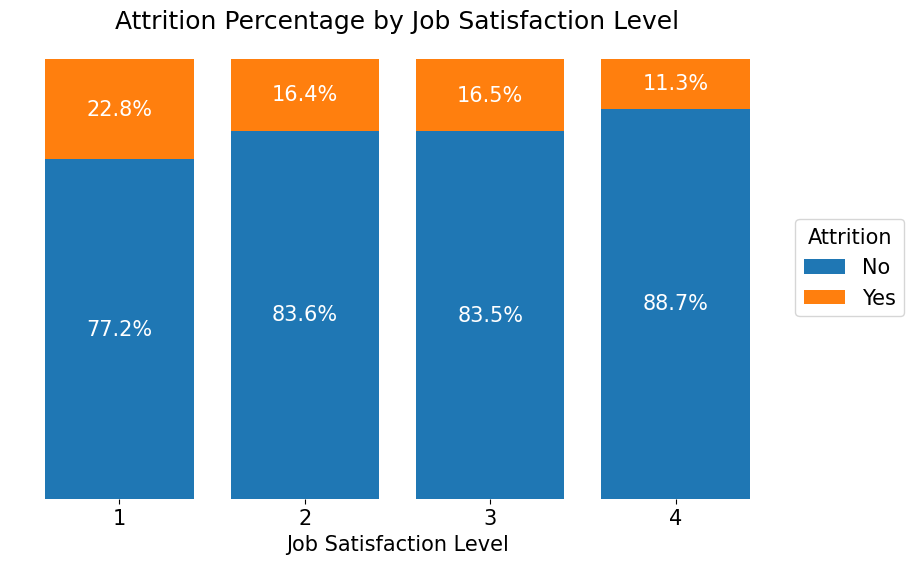

In [219]:
# Calculate the percentage of each Attrition status within each JobSatisfaction level
job_sat_percentage = df.groupby(['JobSatisfaction', 'Attrition']).size()
job_sat_percentage = job_sat_percentage / job_sat_percentage.groupby(level=0).sum() * 100
job_sat_percentage = job_sat_percentage.reset_index(name='Percentage')

# Pivot the data to get Attrition statuses as columns with JobSatisfaction as rows
job_sat_pivot = job_sat_percentage.pivot(index='JobSatisfaction', columns='Attrition', values='Percentage')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Initialize the bottom at zero for the first set of bars
bottom = np.zeros(len(job_sat_pivot))

# Plot each Attrition status by stacking them
for i, col in enumerate(job_sat_pivot.columns):
    plt.bar(job_sat_pivot.index, job_sat_pivot[col], bottom=bottom, label=f'Attrition {col}')
    bottom += job_sat_pivot[col]

# Add the percentage text inside each bar
for i, col in enumerate(job_sat_pivot.columns):
    for index in job_sat_pivot.index:
        value = job_sat_pivot.loc[index, col]
        if value > 0:  # Avoid placing text for zero values
            plt.text(index, job_sat_pivot.loc[index, :col].sum() - (value / 2), f'{value:.1f}%', ha='center', va='center', color='white')

# Customizing the plot
plt.xticks(job_sat_pivot.index)
plt.xlabel('Job Satisfaction Level')
plt.title('Attrition Percentage by Job Satisfaction Level')

# Moving the legend to the right side of the plot
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='center left', bbox_to_anchor=(1, 0.5))

# Remove all spines and y-axis label and ticks
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.savefig('../Plots/Attrition by Job Satisfaction 1.png', format='png', dpi=300)
plt.show()

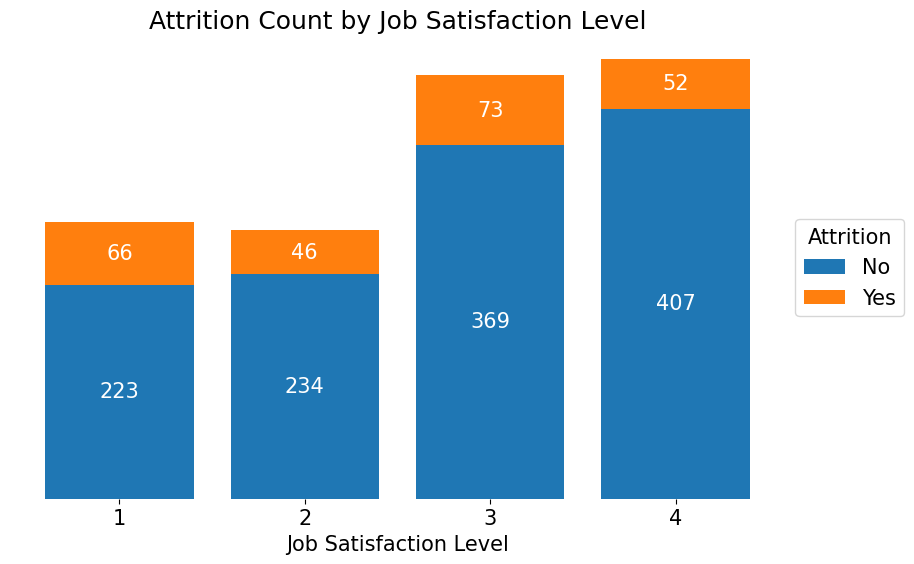

In [220]:
# Calculate the counts of each Attrition status within each JobSatisfaction level
job_sat_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

# Pivot the data to get Attrition statuses as columns with JobSatisfaction as rows
job_sat_pivot = job_sat_counts.pivot(index='JobSatisfaction', columns='Attrition', values='Count')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Initialize the bottom at zero for the first set of bars
bottom = np.zeros(len(job_sat_pivot))

# Plot each Attrition status by stacking them
for i, col in enumerate(job_sat_pivot.columns):
    plt.bar(job_sat_pivot.index, job_sat_pivot[col], bottom=bottom, label=f'Attrition {col}')
    bottom += job_sat_pivot[col]

# Add the count text inside each bar
for i, col in enumerate(job_sat_pivot.columns):
    for index in job_sat_pivot.index:
        value = job_sat_pivot.loc[index, col]
        if value > 0:  # Avoid placing text for zero values
            plt.text(index, job_sat_pivot.loc[index, :col].sum() - (value / 2), f'{value}', ha='center', va='center', color='white')

# Customizing the plot
plt.xticks(job_sat_pivot.index)
plt.xlabel('Job Satisfaction Level')
plt.title('Attrition Count by Job Satisfaction Level')

# Moving the legend to the right side of the plot
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='center left', bbox_to_anchor=(1, 0.5))

# Remove all spines and y-axis label and ticks
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.savefig('../Plots/Attrition by Job Satisfaction 2.png', format='png', dpi=300)
plt.show()

## <a id='toc5_13_'></a>[5.13 Other Features](#toc0_)

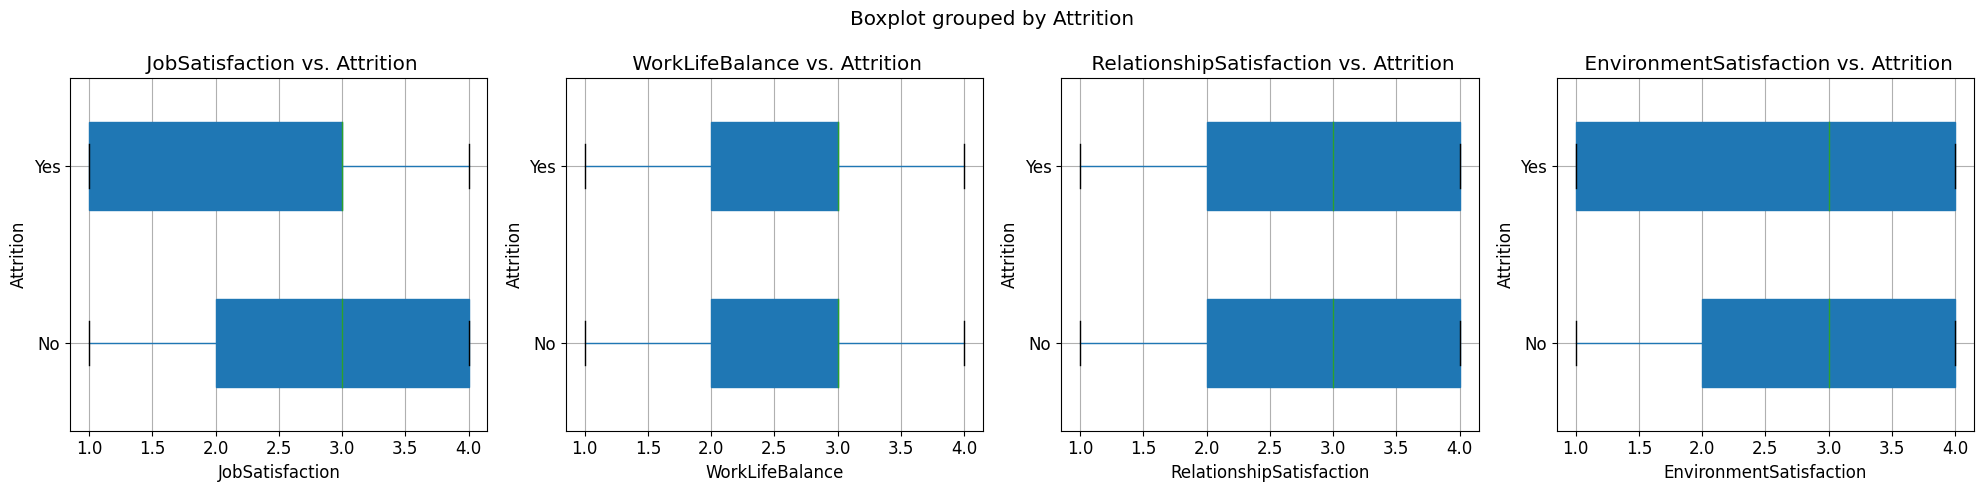

In [85]:
# Create box plots to visualize the distribution of numerical variables by attrition
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(['JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']):
    ax = axes[i]
    df.boxplot(column=feature, by='Attrition', vert=False, widths=0.5, patch_artist=True, sym='.', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Attrition')
    ax.set_title(f' {feature} vs. Attrition')

plt.tight_layout()
plt.show()

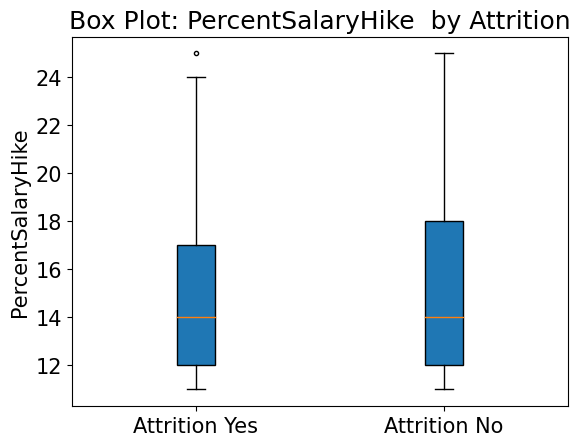

In [228]:
# Create a box plot to visualize MonthlyIncome by attrition
plt.boxplot([df[df['Attrition'] == 1]['PercentSalaryHike'], df[df['Attrition'] == 0]['PercentSalaryHike']],
            labels=['Attrition Yes', 'Attrition No'], patch_artist=True, sym='.')
plt.ylabel('PercentSalaryHike')
plt.title('Box Plot: PercentSalaryHike  by Attrition')
plt.show()

In [229]:
df_yes = df[df['Attrition'] == 1]

In [230]:
df_yes['JobSatisfaction'].value_counts()

JobSatisfaction
3    73
1    66
4    52
2    46
Name: count, dtype: int64

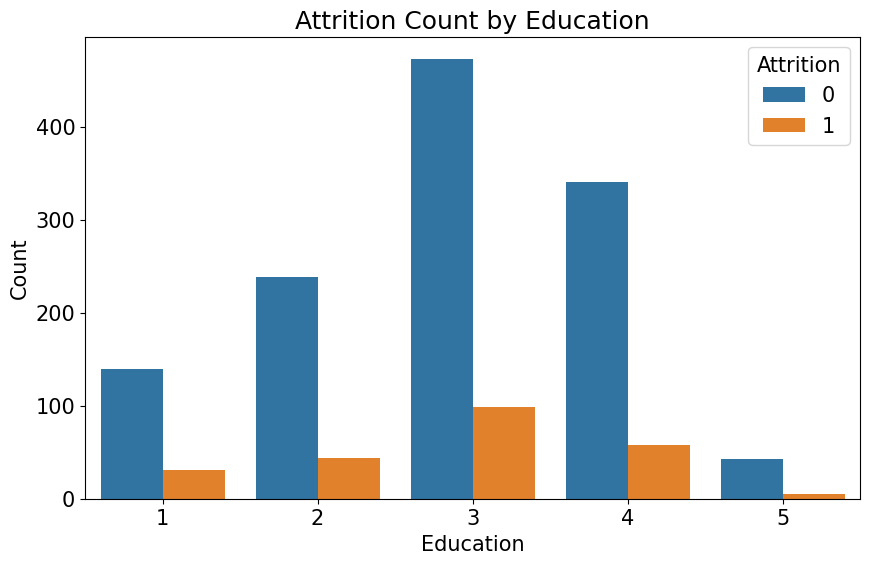

In [231]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Attrition Count by Education')
plt.show()

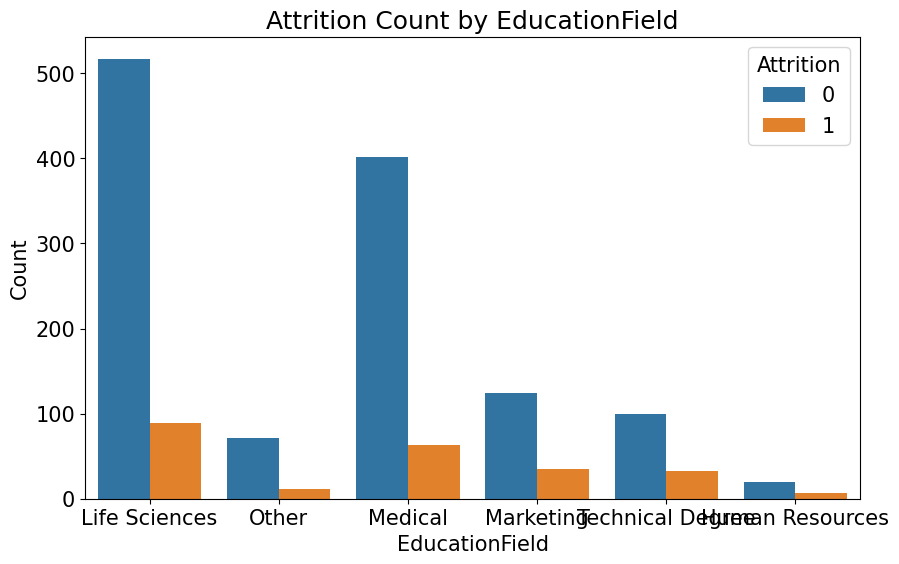

In [232]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.title('Attrition Count by EducationField')
plt.show()

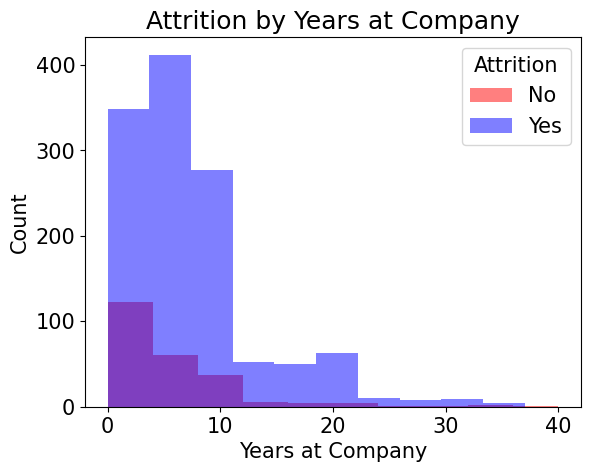

In [233]:
# Create a histogram to visualize attrition by years at the company
plt.hist(df[df['Attrition'] == 1]['YearsAtCompany'], bins=10, alpha=0.5, label='Attrition Yes', color='red')
plt.hist(df[df['Attrition'] == 0]['YearsAtCompany'], bins=10, alpha=0.5, label='Attrition No', color='blue')

plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.title('Attrition by Years at Company')
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.show()

#quanto menos anos uma pessoa está numa empresa, maior tendência terá para sair se houverem factores que contribuam para isso
# que factores serão esses?

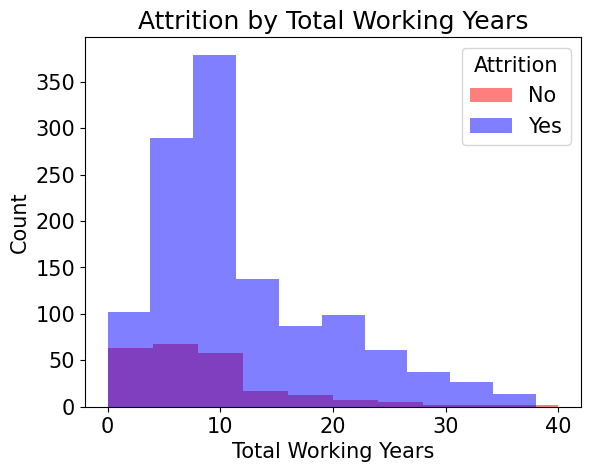

In [235]:
# Create a histogram to visualize attrition by years at the company
plt.hist(df[df['Attrition'] == 1]['TotalWorkingYears'], bins=10, alpha=0.5, label='Attrition Yes', color='red')
plt.hist(df[df['Attrition'] == 0]['TotalWorkingYears'], bins=10, alpha=0.5, label='Attrition No', color='blue')

plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.title('Attrition by Total Working Years')
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.show()


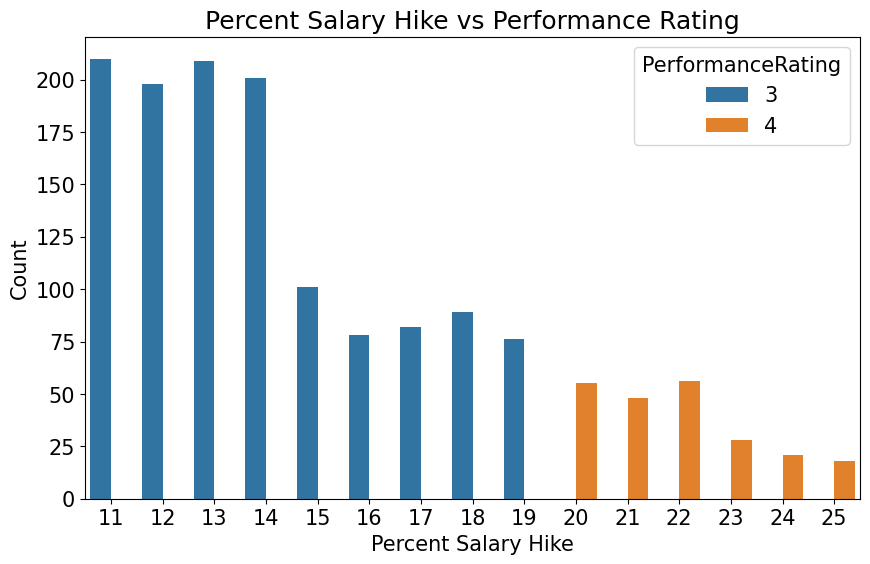

In [236]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PercentSalaryHike', hue='PerformanceRating', data=df)
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.title('Percent Salary Hike vs Performance Rating')
plt.show()

In [237]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [238]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,0,1
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [239]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') 

Attrition,0,1
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [240]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,0,1
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [241]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,0,1
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


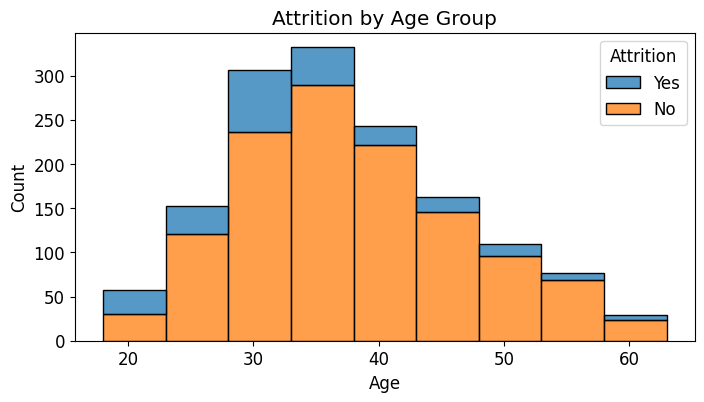

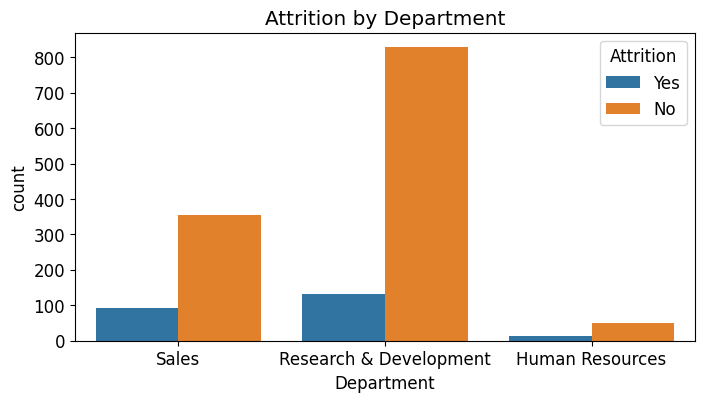

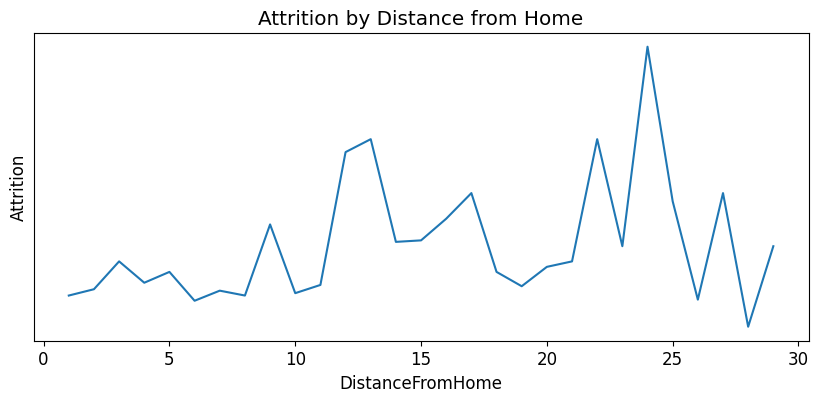

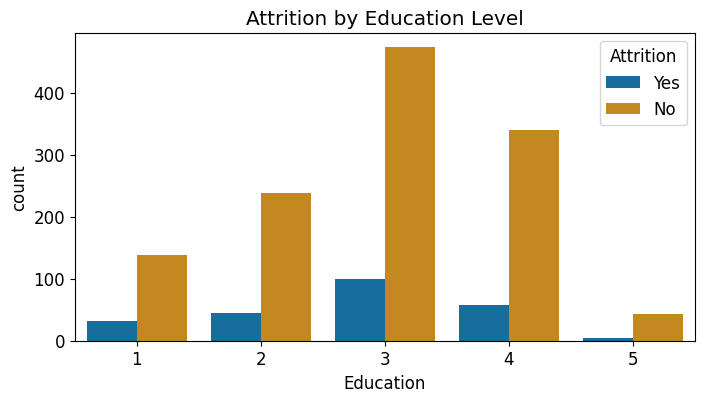

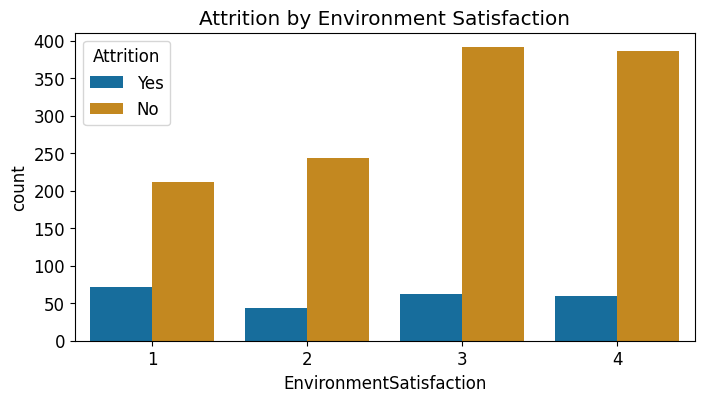

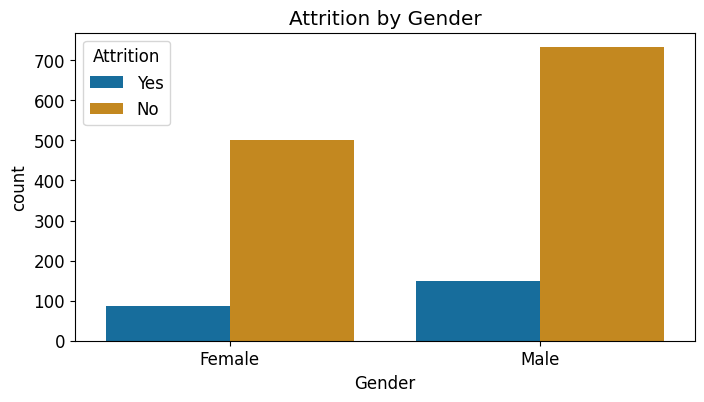

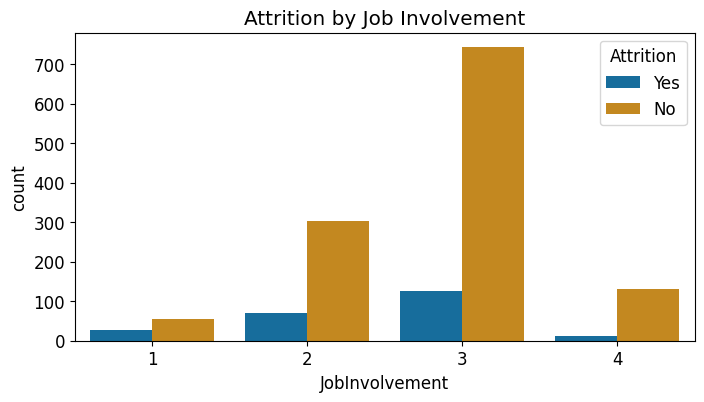

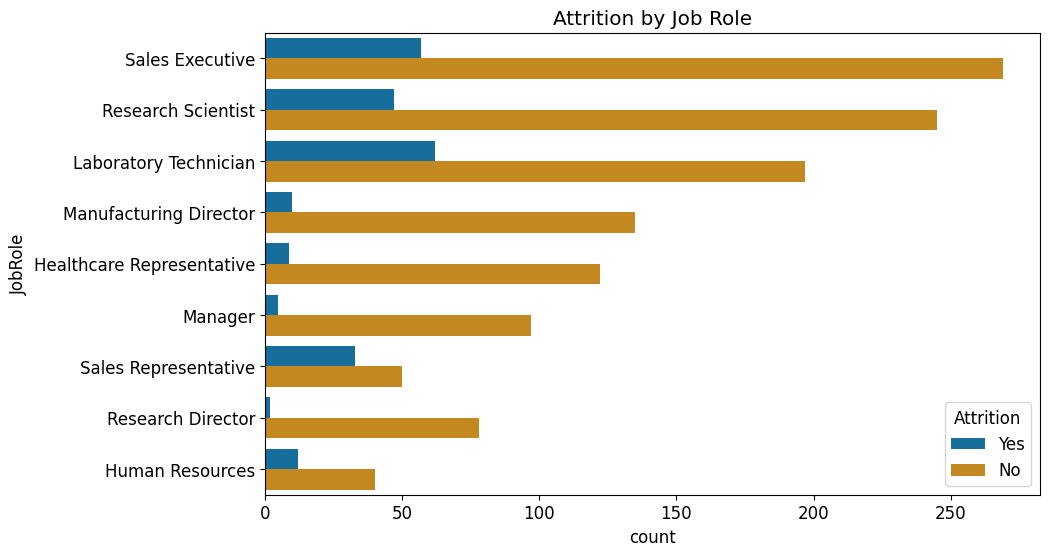

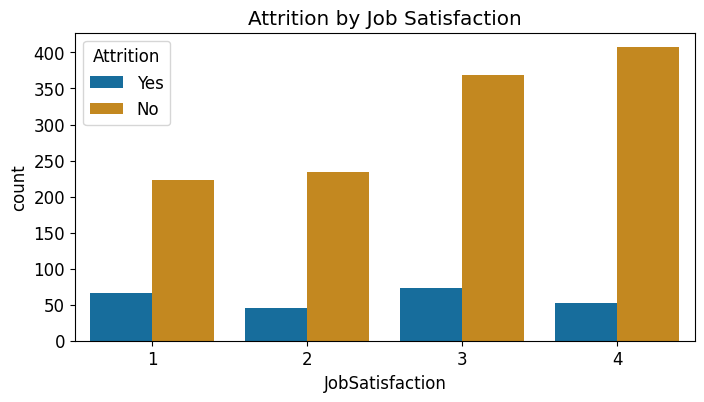

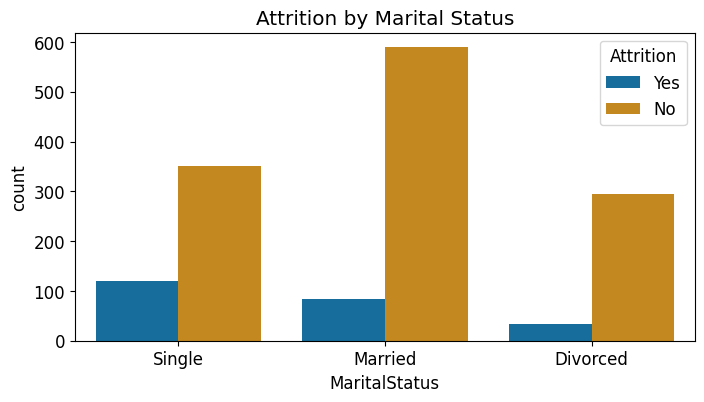

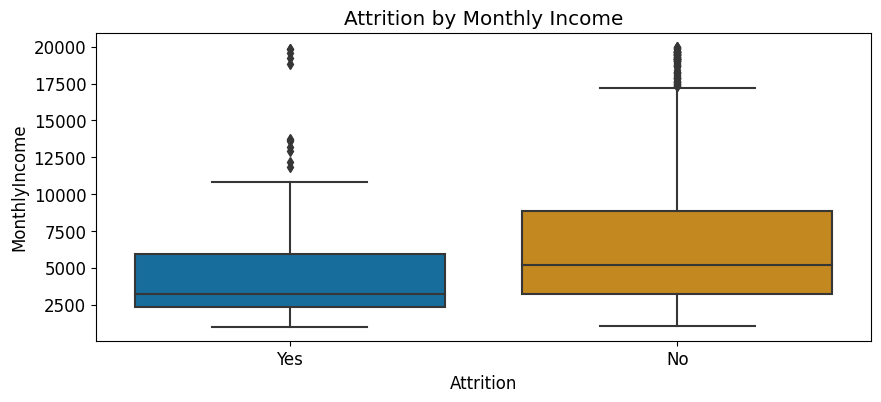

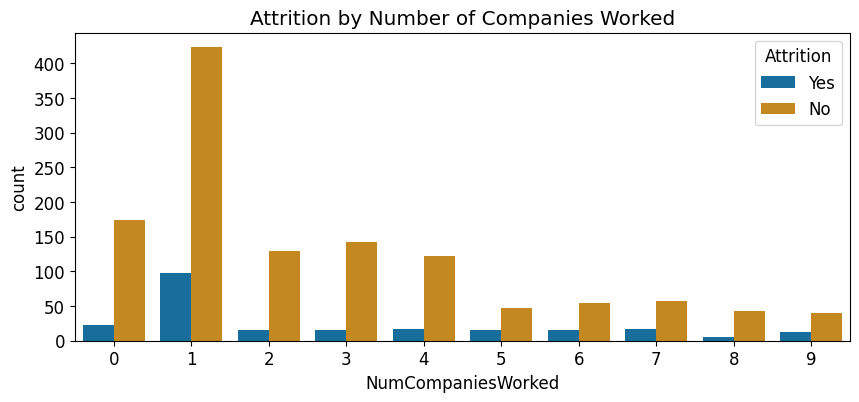

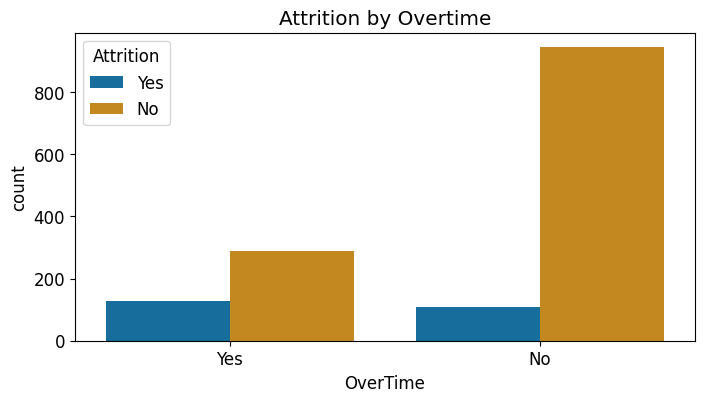

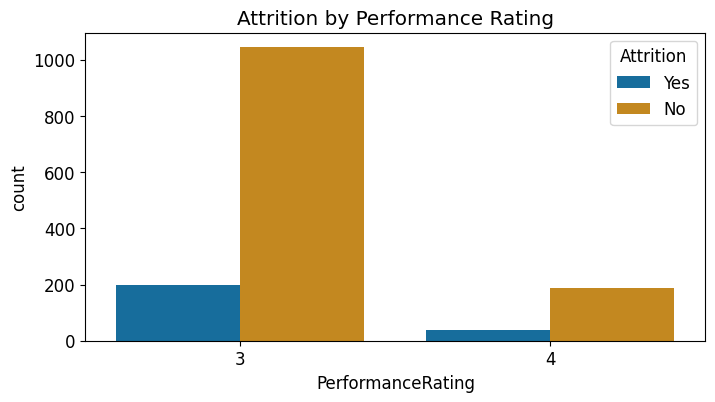

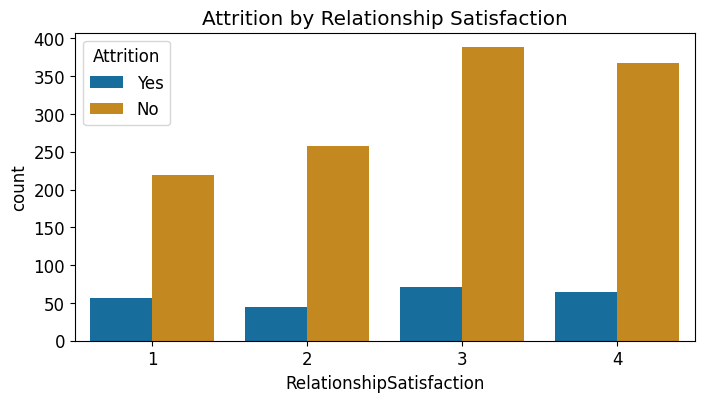

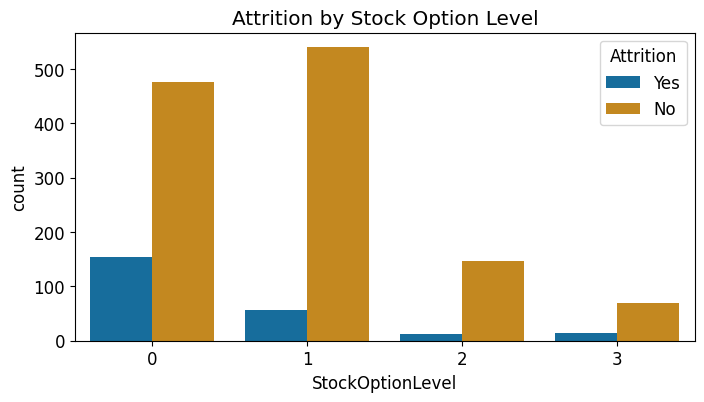

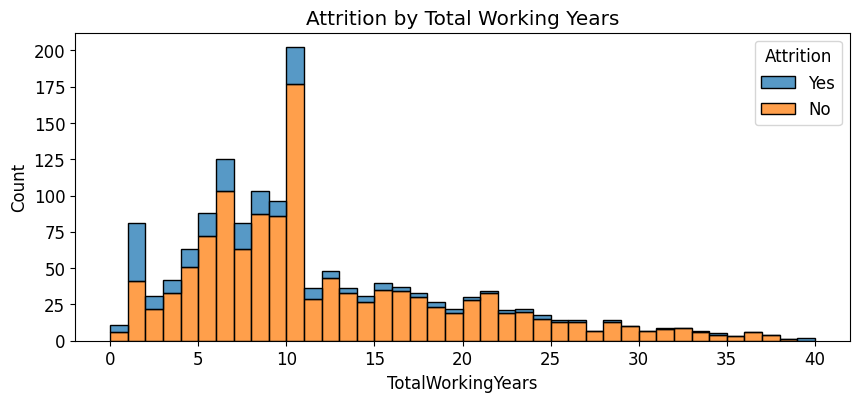

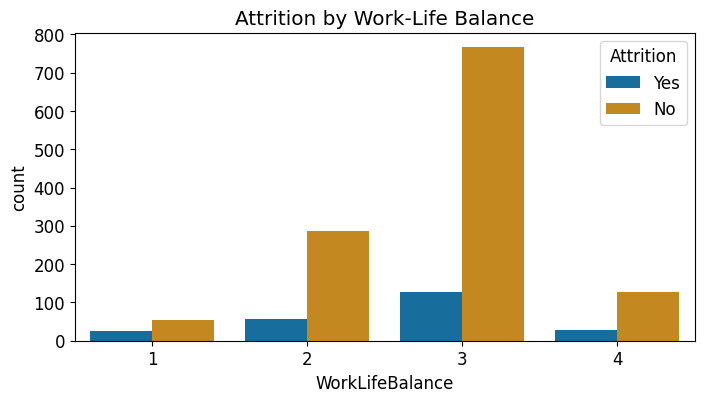

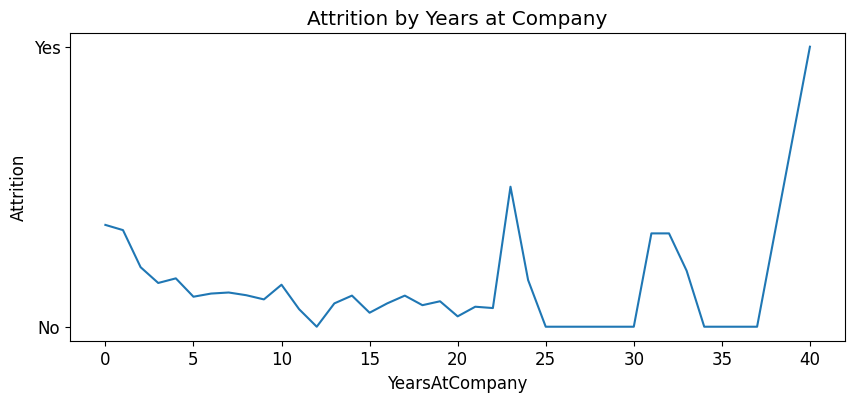

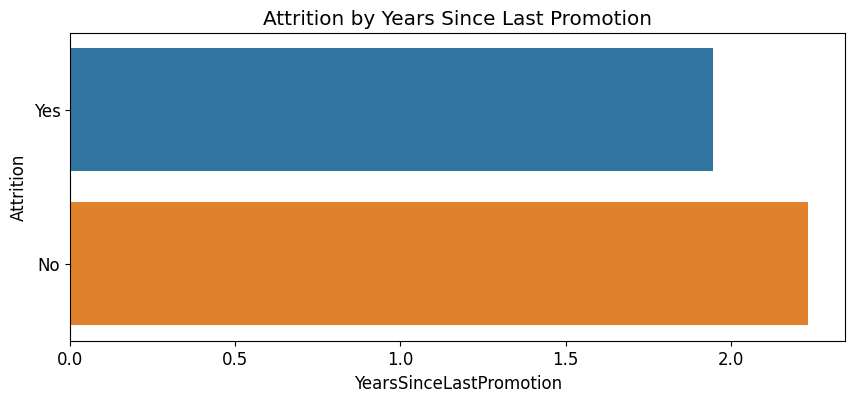

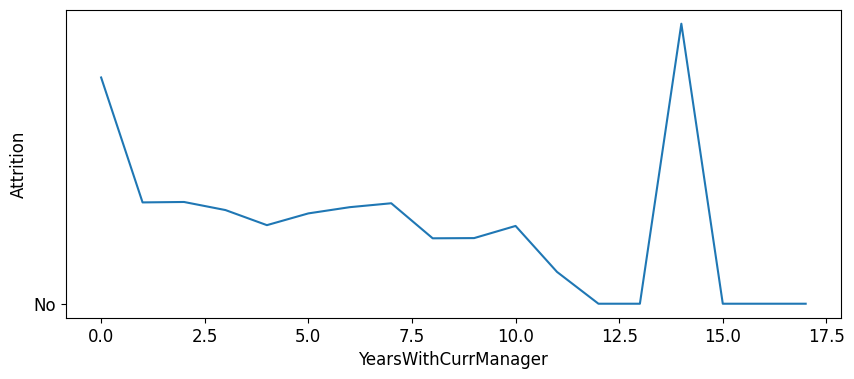

In [4]:
# Plot 1: Attrition by Age Group
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', binwidth=5)
plt.title('Attrition by Age Group')
plt.show()

# Plot 2: Attrition by Department
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()

# Repeat similar steps for the rest of the plots, for example:

# Plot 3: Attrition by Distance from Home
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='DistanceFromHome', y='Attrition', ci=None)
plt.title('Attrition by Distance from Home')
plt.show()

# Plot 4: Attrition by Education Level
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Education', hue='Attrition', palette='colorblind')
plt.title('Attrition by Education Level')
plt.show()

# Plot 5: Attrition by Environment Satisfaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette='colorblind')
plt.title('Attrition by Environment Satisfaction')
plt.show()

# Plot 6: Attrition by Gender
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='colorblind')
plt.title('Attrition by Gender')
plt.show()

# Plot 7: Attrition by Job Involvement
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='JobInvolvement', hue='Attrition', palette='colorblind')
plt.title('Attrition by Job Involvement')
plt.show()

# Plot 8: Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition', palette='colorblind')
plt.title('Attrition by Job Role')
plt.show()

# Plot 9: Attrition by Job Satisfaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='colorblind')
plt.title('Attrition by Job Satisfaction')
plt.show()

# Plot 10: Attrition by Marital Status
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='colorblind')
plt.title('Attrition by Marital Status')
plt.show()

# Plot 11: Attrition by Monthly Income
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='colorblind')
plt.title('Attrition by Monthly Income')
plt.show()

# Plot 12: Attrition by Number of Companies Worked
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='NumCompaniesWorked', hue='Attrition', palette='colorblind')
plt.title('Attrition by Number of Companies Worked')
plt.show()

# Plot 13: Attrition by Overtime
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='colorblind')
plt.title('Attrition by Overtime')
plt.show()

# Plot 14: Attrition by Performance Rating
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='PerformanceRating', hue='Attrition', palette='colorblind')
plt.title('Attrition by Performance Rating')
plt.show()

# Plot 15: Attrition by Relationship Satisfaction
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='RelationshipSatisfaction', hue='Attrition', palette='colorblind')
plt.title('Attrition by Relationship Satisfaction')
plt.show()

# Plot 16: Attrition by Stock Option Level
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='StockOptionLevel', hue='Attrition', palette='colorblind')
plt.title('Attrition by Stock Option Level')
plt.show()

# Plot 17: Attrition by Total Working Years
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', multiple='stack', binwidth=1)
plt.title('Attrition by Total Working Years')
plt.show()

# Plot 18: Attrition by Work-Life Balance
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='colorblind')
plt.title('Attrition by Work-Life Balance')
plt.show()

# Plot 19: Attrition by Years at Company
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='YearsAtCompany', y='Attrition', estimator='mean', ci=None)
plt.title('Attrition by Years at Company')
plt.show()

# Plot 20: Attrition by Years Since Last Promotion
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='YearsSinceLastPromotion', y='Attrition', ci=None)
plt.title('Attrition by Years Since Last Promotion')
plt.show()

# Plot 21: Attrition by Years with Current Manager
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='YearsWithCurrManager', y='Attrition', estimator='mean', ci=None)
plt.show()